# ROSE-TIME SERIES FORECAST

In [189]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [190]:
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import month_plot



## 1. Read the data as an appropriate Time Series data and plot the data. 

In [191]:
df1 = pd.read_csv('Rose.csv')
df = pd.read_csv('Rose.csv')

In [192]:
df1.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [193]:
df1.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [194]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


### Converting column to datetime and making it as index 

In [195]:
date = pd.date_range(start='1/1/1980', periods=len(df), freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [196]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [197]:
df.set_index('Time_Stamp',inplace=True)
df.drop('YearMonth', axis = 1, inplace =True)

In [198]:
df.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [199]:
df.tail()

Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [201]:
df.shape

(187, 1)

In [202]:
df.isnull().sum()

Rose    2
dtype: int64

In [203]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Setting figure size

In [204]:
from pylab import rcParams
rcParams['figure.figsize'] = 22,9

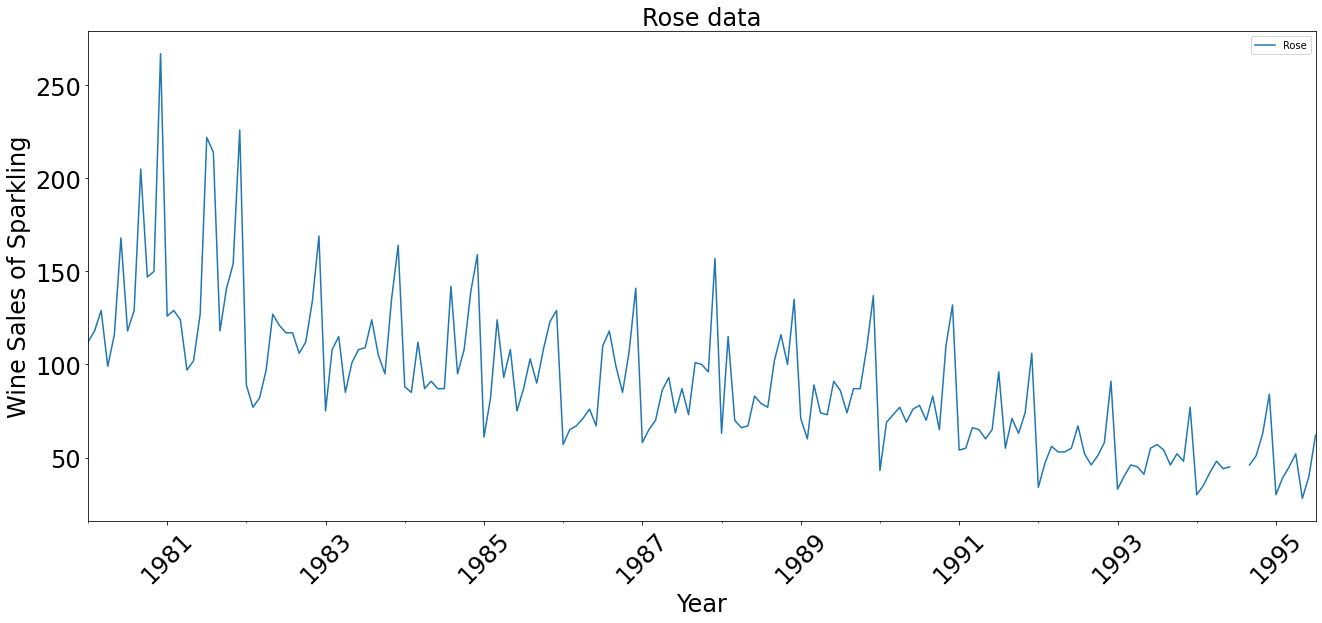

In [205]:
#Plot the time series
df.plot()

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.title("Rose data",fontsize=24)
plt.xlabel('Year',fontsize=24)
plt.ylabel('Wine Sales of Sparkling',fontsize=24, rotation = 90)

plt.show()

### Null Value Imputation

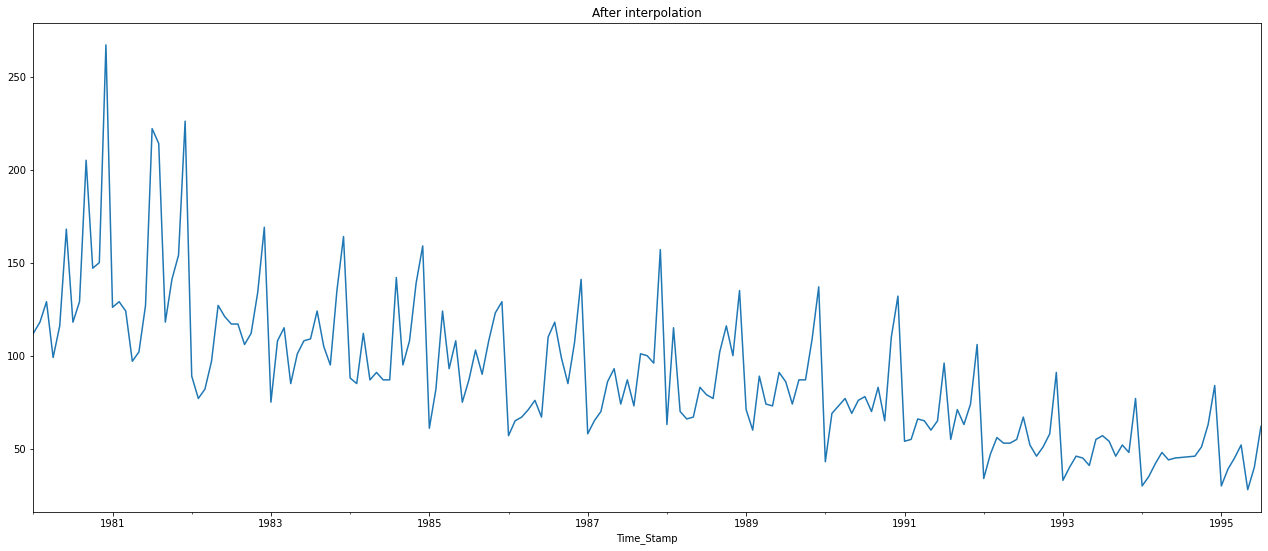

In [206]:
series = df.copy()
dff                = pd.DataFrame(series)

series.converted  = dff['Rose']
ts                = series.converted.resample('M').mean() #the syntax has changed due to the updated version
#of the packages

series_imputed1   = ts.interpolate(method = 'linear')

series_imputed1.plot()
plt.title('After interpolation')
plt.show()

In [207]:
series_imputed1

Time_Stamp
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
              ...  
1995-03-31     45.0
1995-04-30     52.0
1995-05-31     28.0
1995-06-30     40.0
1995-07-31     62.0
Freq: M, Name: Rose, Length: 187, dtype: float64

In [208]:
df['Rose'] = series_imputed1
df

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1995-03-31   45.0
1995-04-30   52.0
1995-05-31   28.0
1995-06-30   40.0
1995-07-31   62.0

[187 rows x 1 columns]

In [421]:
df.isnull().sum()

Rose    0
dtype: int64

In [422]:
df.describe()

Rose
count  187.000000
mean    89.914439
std     39.238325
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

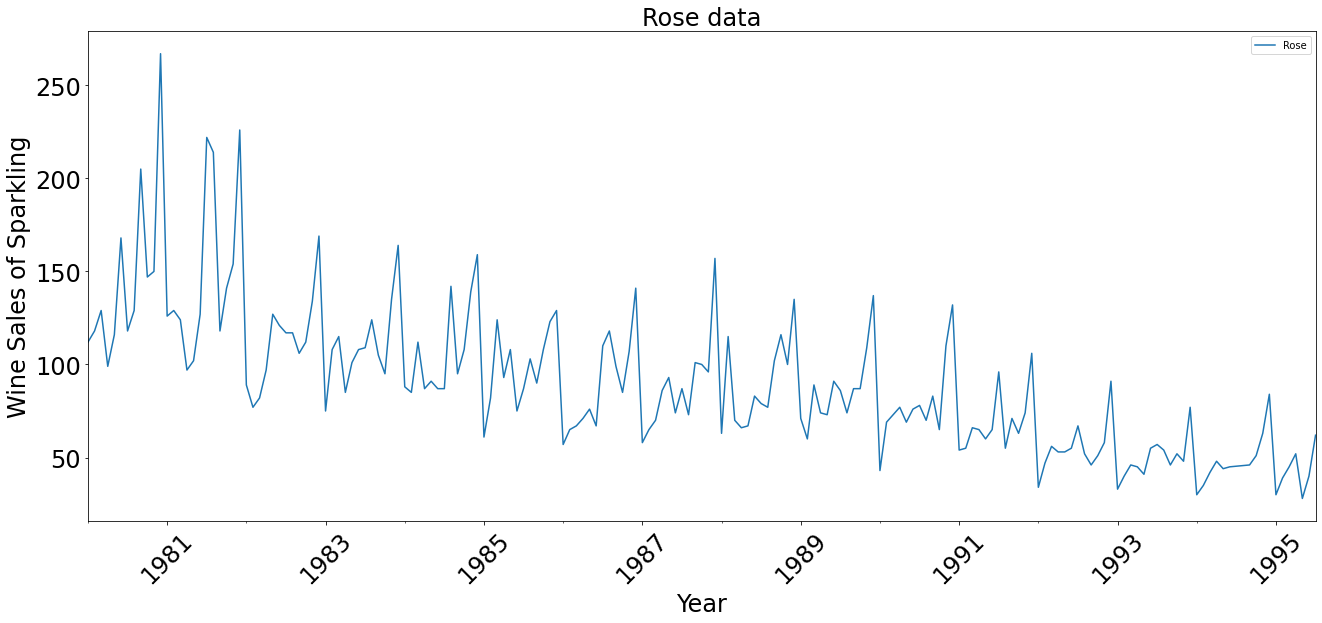

In [209]:
#Plot the time series
df.plot()

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.title("Rose data",fontsize=24)
plt.xlabel('Year',fontsize=24)
plt.ylabel('Wine Sales of Sparkling',fontsize=24, rotation = 90)

plt.show()

In [210]:
#Let's try to do log transformation
df_log = df.copy()
df_log['Sparkling'] = np.log(df)


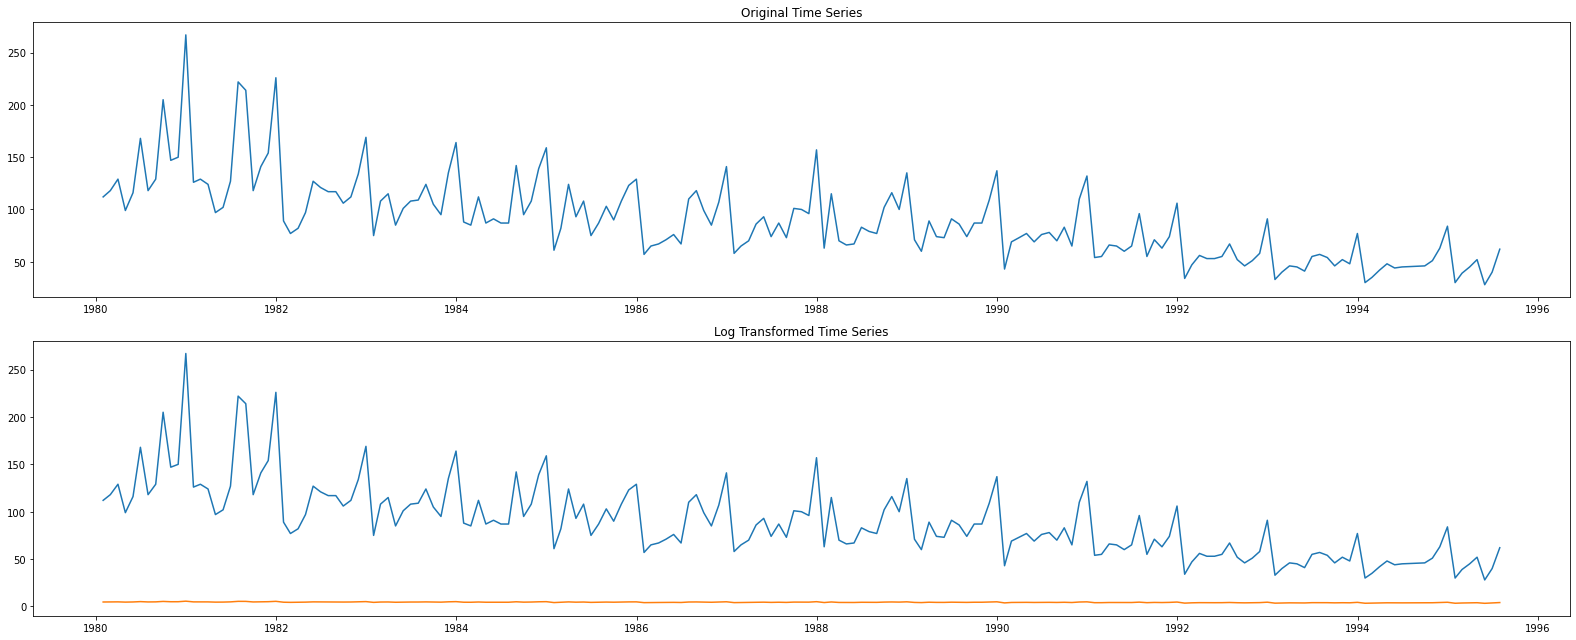

In [211]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df_log)
plt.tight_layout()

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

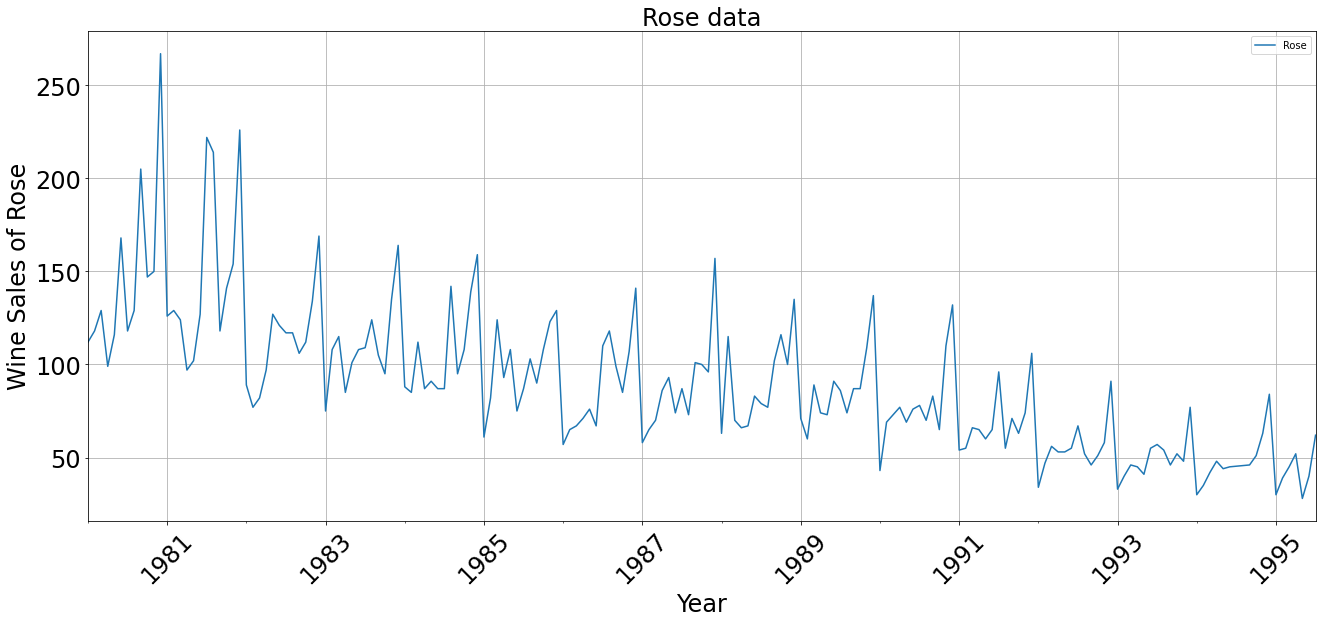

In [212]:
df.plot();
plt.legend(loc='best')
plt.title("Rose data",fontsize=24)

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.xlabel('Year',fontsize=24)
plt.ylabel('Wine Sales of Rose',fontsize=24, rotation = 90)
plt.grid()

In [213]:
round(df.describe(),2)

Rose
count  187.00
mean    89.91
std     39.24
min     28.00
25%     62.50
50%     85.00
75%    111.00
max    267.00

### Monthly EDA 

No handles with labels found to put in legend.


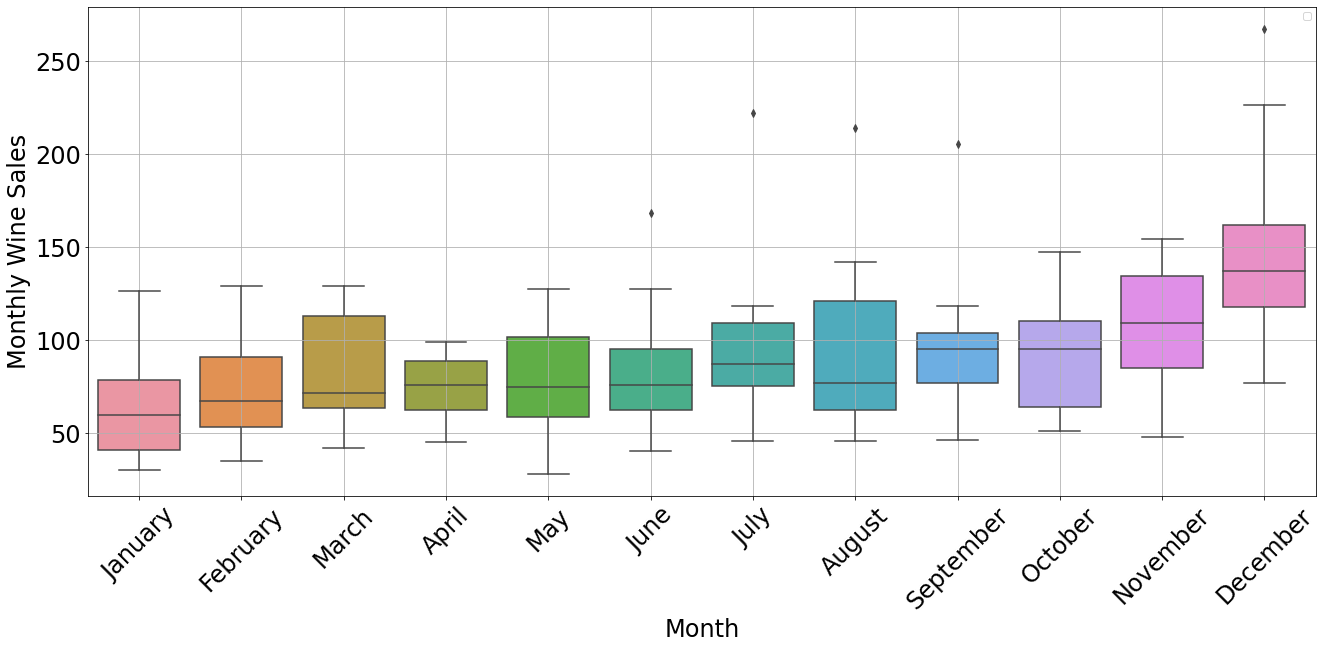

In [427]:
fig, ax = plt.subplots(figsize=(22,9))
sns.boxplot(df.index.month_name(), df.Rose, ax=ax,whis=1.5)

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.xlabel('Month',fontsize=24);
plt.ylabel('Monthly Wine Sales',fontsize=24);




plt.legend(loc='best')
plt.grid();



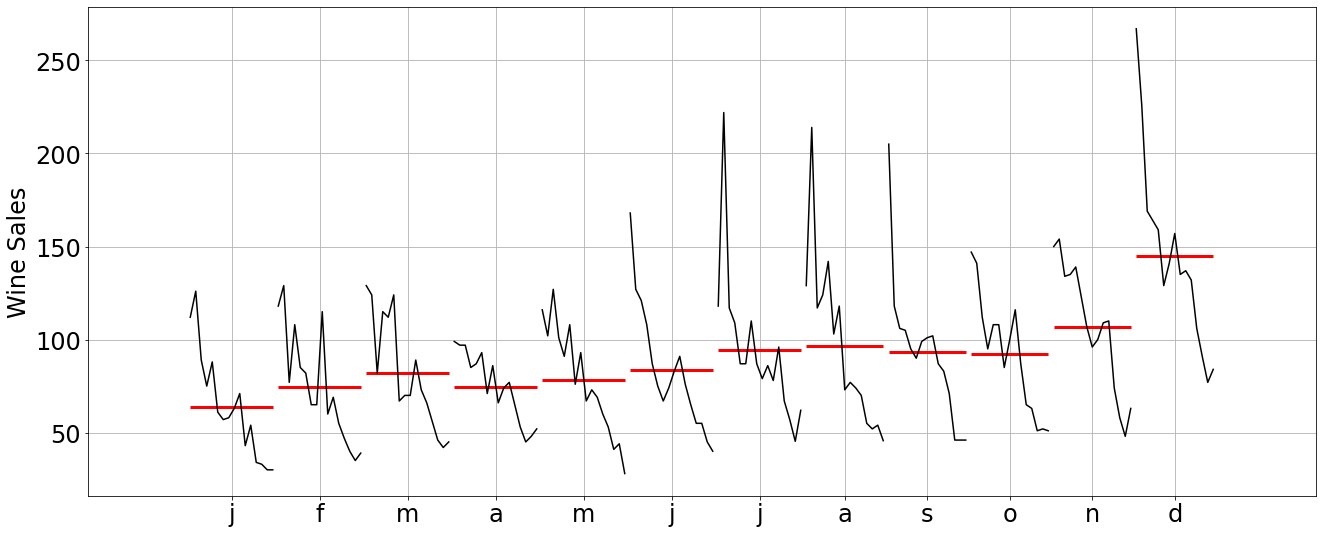

In [215]:
fig, ax = plt.subplots(figsize=(22,9))

month_plot(df,ylabel='Wine Sales',ax=ax)
plt.ylabel('Wine Sales',fontsize=24);
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
plt.grid();

### Yearly EDA 

In [216]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October','November', 'December']

yearly_sales_across_months = pd.pivot_table(df, values = 'Rose',
                                            columns = df.index.month, 
                                            index = df.index.year)

yearly_sales_across_months.columns = months
yearly_sales_across_months

January  February  March  April    May   June        July  \
Time_Stamp                                                              
1980          112.0     118.0  129.0   99.0  116.0  168.0  118.000000   
1981          126.0     129.0  124.0   97.0  102.0  127.0  222.000000   
1982           89.0      77.0   82.0   97.0  127.0  121.0  117.000000   
1983           75.0     108.0  115.0   85.0  101.0  108.0  109.000000   
1984           88.0      85.0  112.0   87.0   91.0   87.0   87.000000   
1985           61.0      82.0  124.0   93.0  108.0   75.0   87.000000   
1986           57.0      65.0   67.0   71.0   76.0   67.0  110.000000   
1987           58.0      65.0   70.0   86.0   93.0   74.0   87.000000   
1988           63.0     115.0   70.0   66.0   67.0   83.0   79.000000   
1989           71.0      60.0   89.0   74.0   73.0   91.0   86.000000   
1990           43.0      69.0   73.0   77.0   69.0   76.0   78.000000   
1991           54.0      55.0   66.0   65.0   60.0   65.0   96.000000   
1992           34.0      47.0   56.0   53.0   53.0   55.0   67.000000   
1993           33.0      40.0   46.0   45.0   41.0   55.0   57.000000   
1994           30.0      35.0   42.0   48.0   44.0   45.0   45.333333   
1995           30.0      39.0   45.0   52.0   28.0   40.0   62.000000   

                August  September  October  November  December  
Time_Stamp                                                      
1980        129.000000      205.0    147.0     150.0     267.0  
1981        214.000000      118.0    141.0     154.0     226.0  
1982        117.000000      106.0    112.0     134.0     169.0  
1983        124.000000      105.0     95.0     135.0     164.0  
1984        142.000000       95.0    108.0     139.0     159.0  
1985        103.000000       90.0    108.0     123.0     129.0  
1986        118.000000       99.0     85.0     107.0     141.0  
1987         73.000000      101.0    100.0      96.0     157.0  
1988         77.000000      102.0    116.0     100.0     135.0  
1989         74.000000       87.0     87.0     109.0     137.0  
1990         70.000000       83.0     65.0     110.0     132.0  
1991         55.000000       71.0     63.0      74.0     106.0  
1992         52.000000       46.0     51.0      58.0      91.0  
1993         54.000000       46.0     52.0      48.0      77.0  
1994         45.666667       46.0     51.0      63.0      84.0  
1995               NaN        NaN      NaN       NaN       NaN

#### Yearly variation 

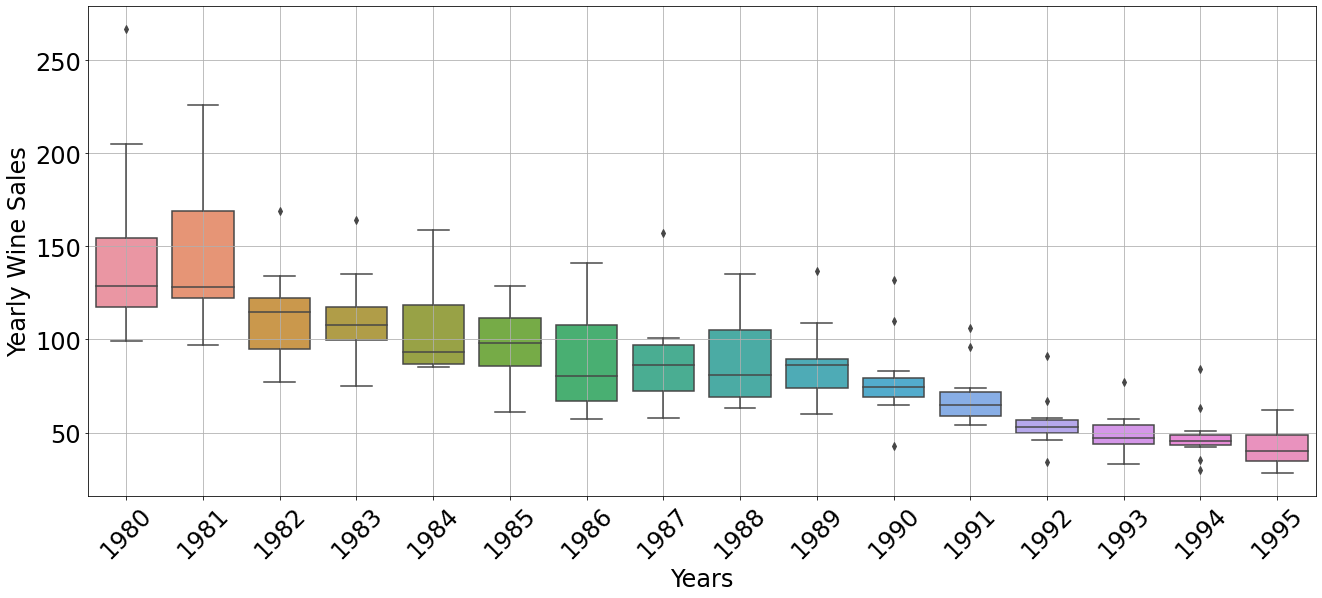

In [217]:
fig, ax = plt.subplots(figsize=(22,9))
sns.boxplot(df.index.year, df.Rose, ax=ax,whis=1.5)


plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.xlabel('Years',fontsize=24);
plt.ylabel('Yearly Wine Sales',fontsize=24);

plt.grid();

#### Monthly variation across all years 

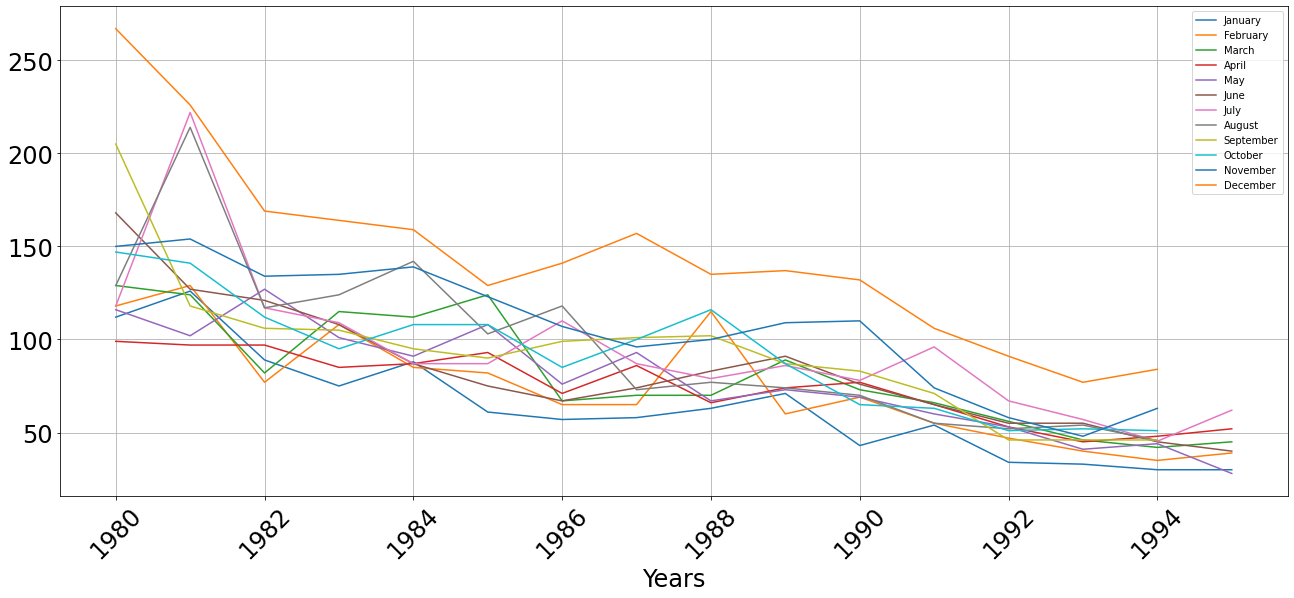

In [218]:
fig, ax = plt.subplots(figsize=(22,9))
yearly_sales_across_months.plot(ax=ax)


plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.xlabel('Years',fontsize=24);
plt.grid();

#### Yearly Wine sales 

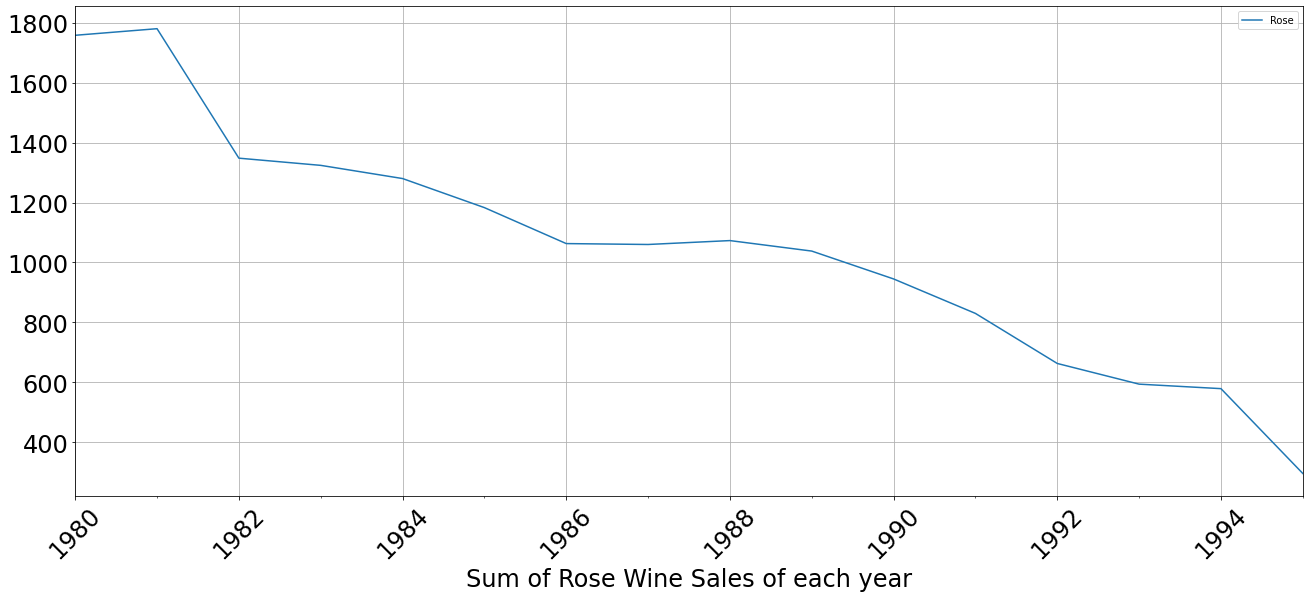

In [219]:
df_yearly_sum = df.resample('Y').sum()
df_yearly_sum.plot();

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.grid()

plt.xlabel('Sum of Rose Wine Sales of each year',fontsize=24);

### Empirical Cumulative Distribution 

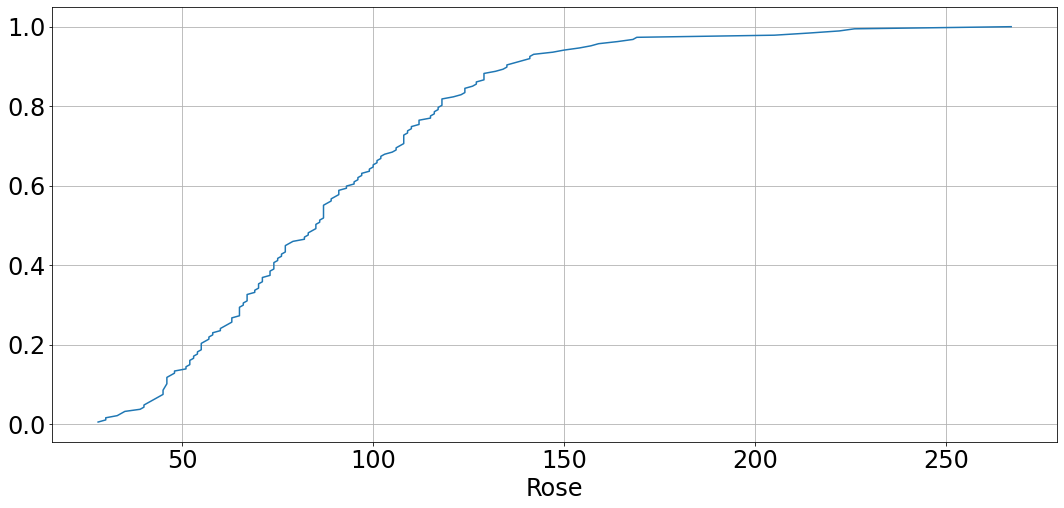

In [220]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");

plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)

plt.grid()
plt.xlabel('Rose',fontsize=24);

### Average RetailSales per month and the month on month percentage change of WineSales. 

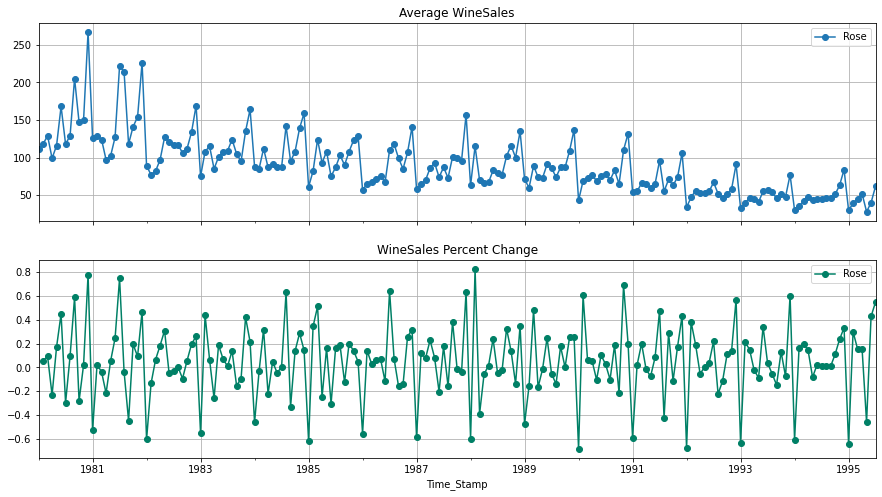

In [221]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()


fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average WineSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="WineSales Percent Change",grid=True)


### Additive Decomposition 

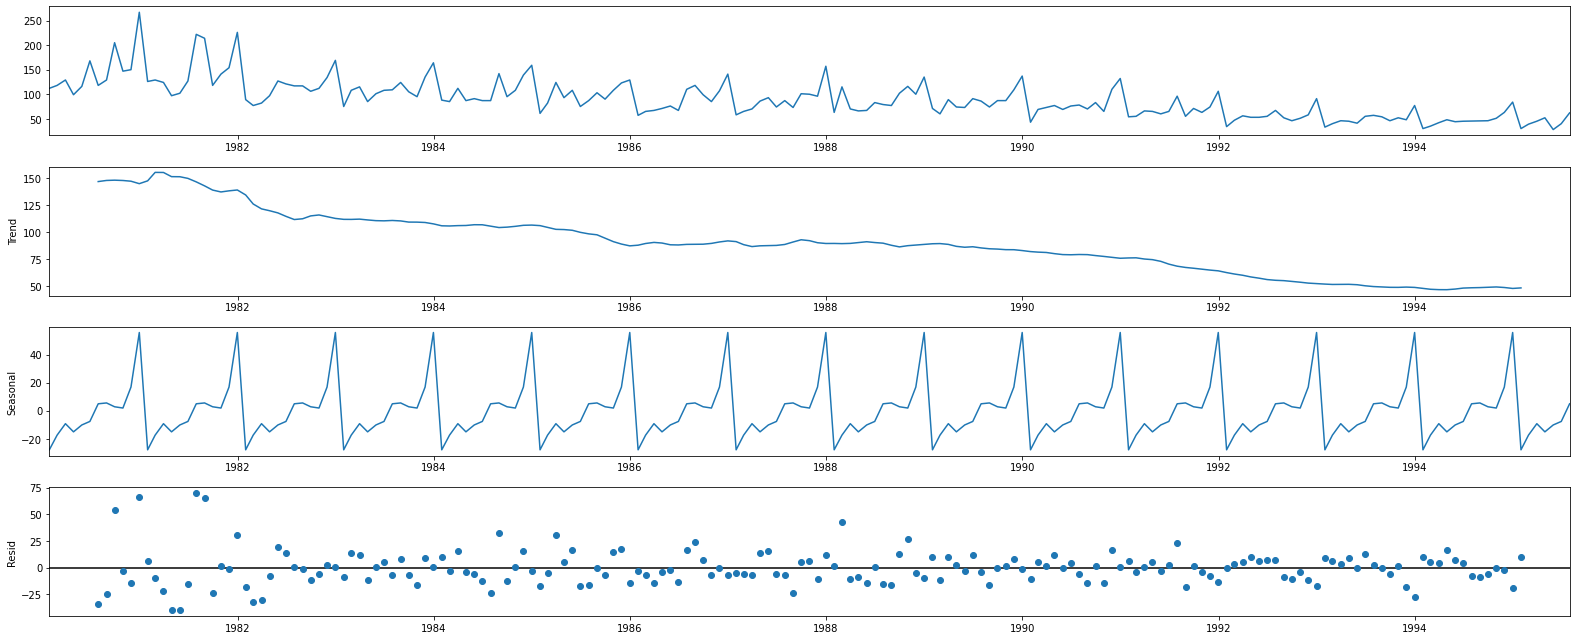

In [222]:
#Decompose the time series additively
df1_add_decompose = seasonal_decompose(df, model = 'additive', period = 12)
df1_add_decompose.plot()

plt.show()

In [223]:
trend = df1_add_decompose.trend
seasonality = df1_add_decompose.seasonal
residual = df1_add_decompose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16

### Multiplicative Decomposition 

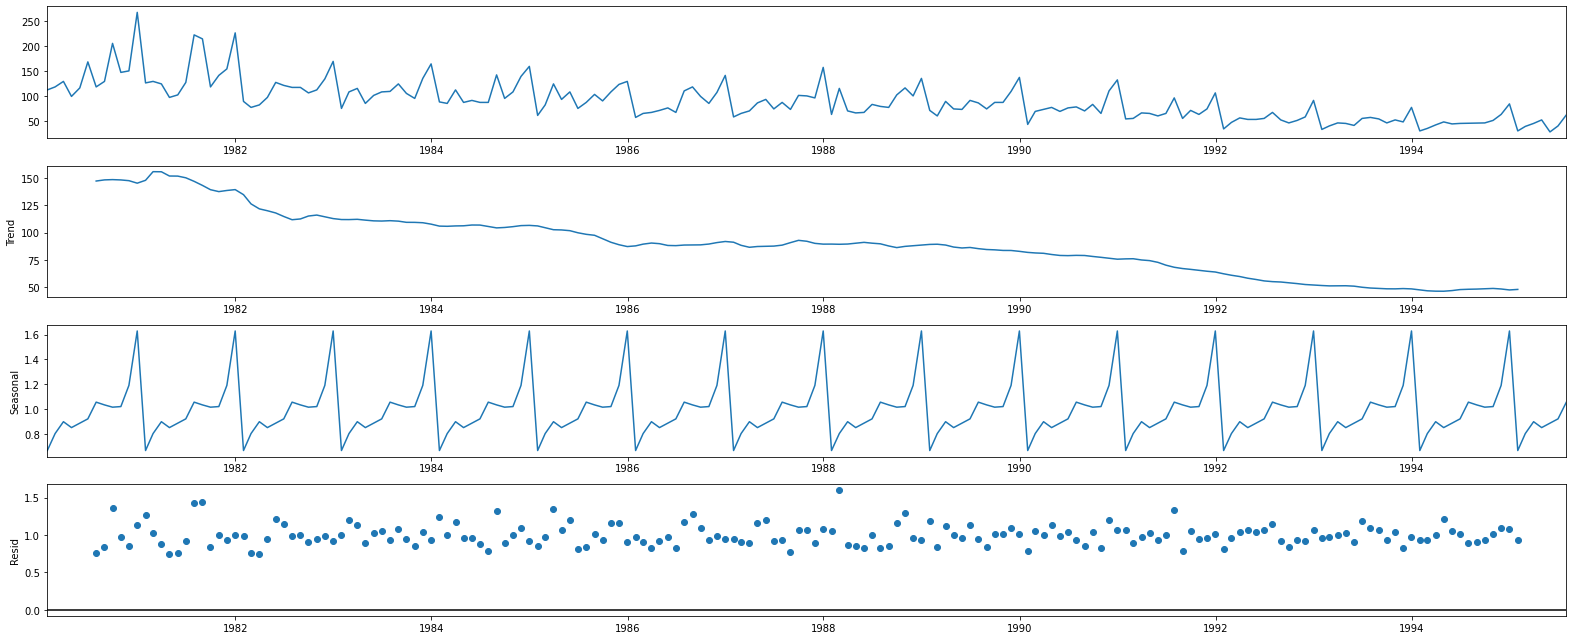

In [224]:
##Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

In [225]:
trend = df1_mul_decompose.trend
seasonality = df1_mul_decompose.seasonal
residual = df1_mul_decompose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

## 3. Split the data into training and test. The test data should start in 1991.

In [226]:
from   IPython.display                 import display

In [227]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [228]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [229]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

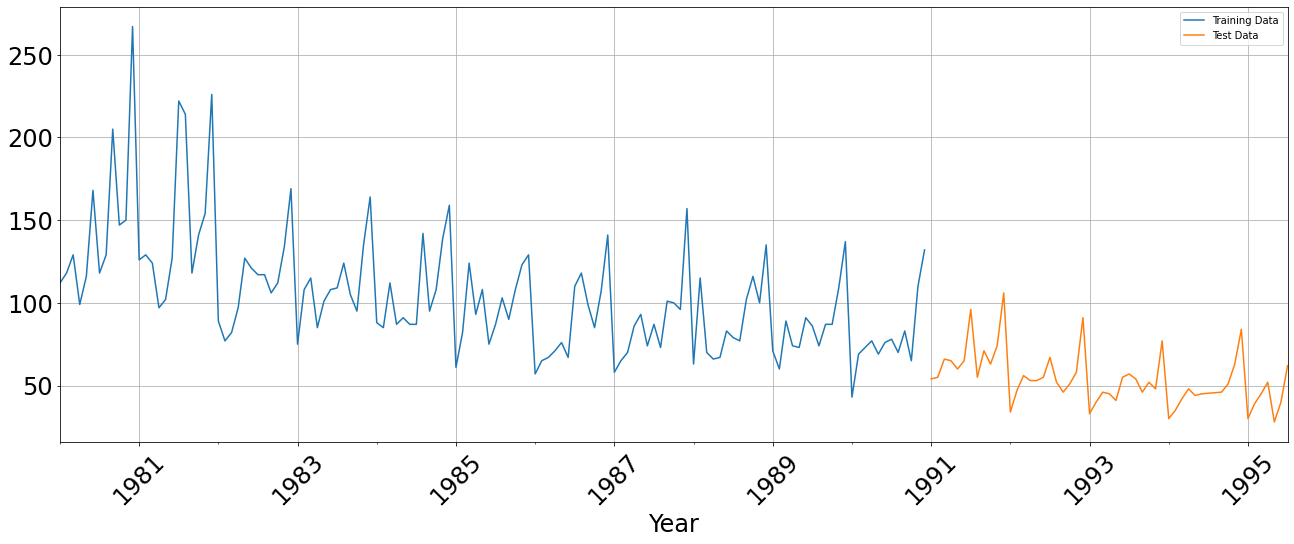

In [230]:
train['Rose'].plot(figsize=(22,8), fontsize=14)
test['Rose'].plot(figsize=(22,8), fontsize=14)

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.grid()
plt.legend(['Training Data','Test Data'])
plt.xlabel('Year',fontsize=24)
plt.show()

## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [231]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [232]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



### Model 1: Linear Regression

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [234]:
lr = LinearRegression()

lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

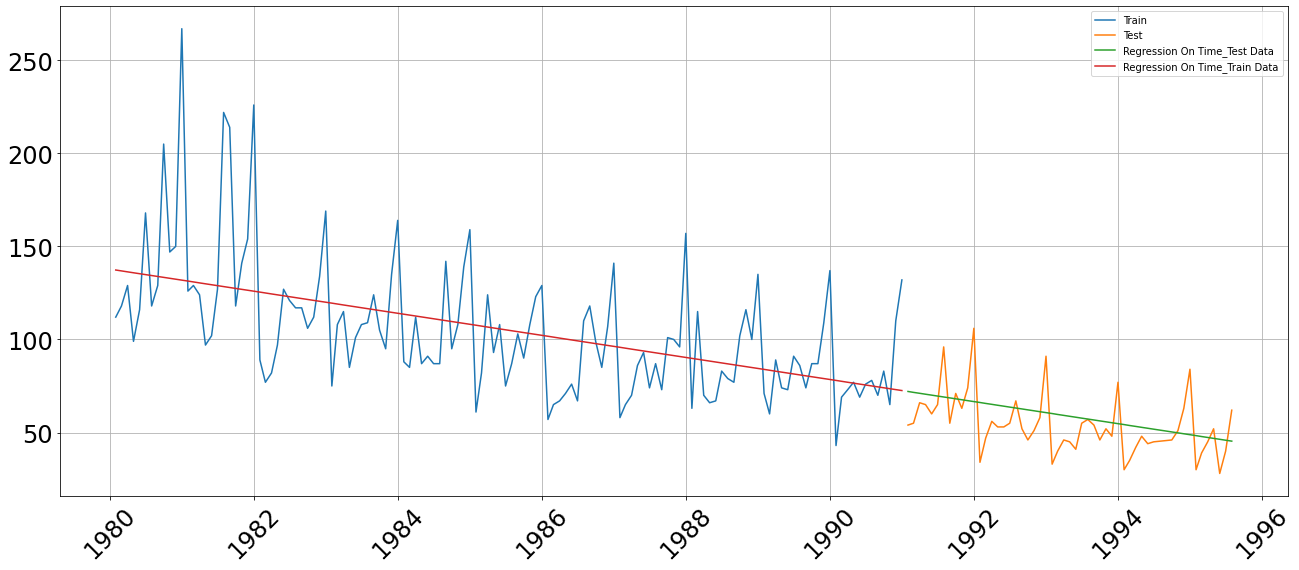

In [235]:
train_predictions_model1              = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime']   = train_predictions_model1

test_predictions_model1              = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime']   = test_predictions_model1


plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

Model Evaluation by RMSE

In [236]:
## Train Data - RMSE
rmse_model1_train = metrics.mean_squared_error(train['Rose'],train_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model1_train))

## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Train Data,  RMSE is 30.718
For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [237]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  15.268955

## Model 2: Naive Approach

In [238]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [239]:
NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

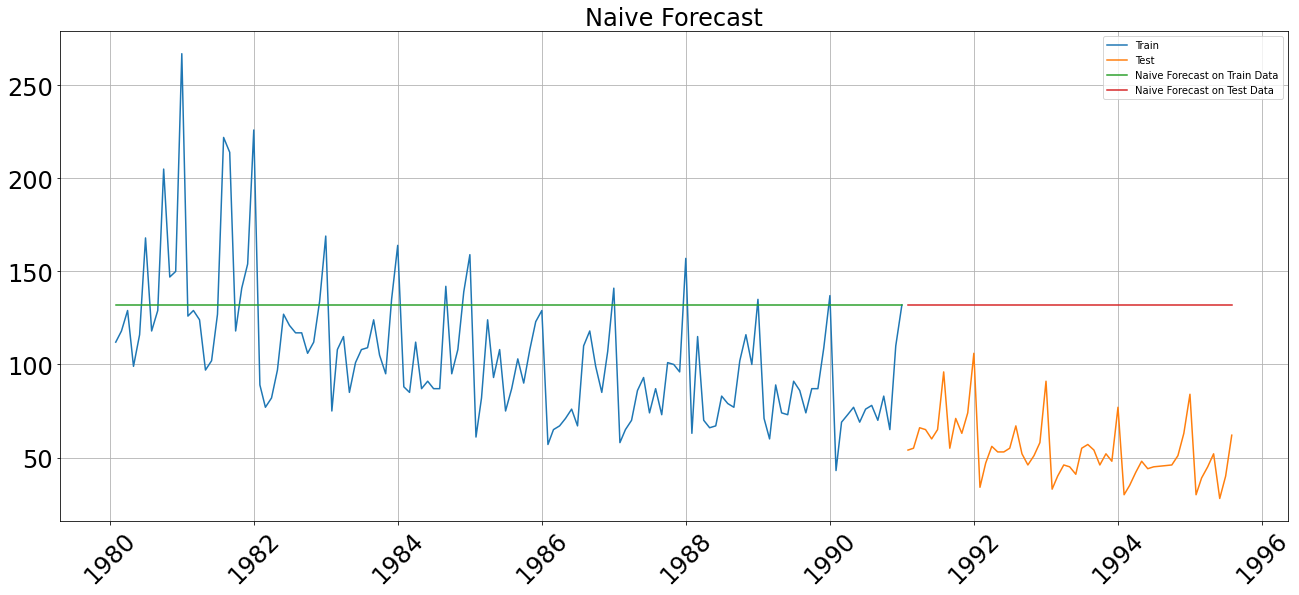

In [240]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Train Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.title("Naive Forecast",fontsize=24)
plt.grid();

Model Evaluation by RMSE

In [241]:
## Train Data - RMSE

rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive'],squared=False)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model2_train))

## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Train Data,  RMSE is 45.064
For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [242]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  15.268955
NaiveModel        79.718773

## Model 3: Simple Average

In [243]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [244]:
SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

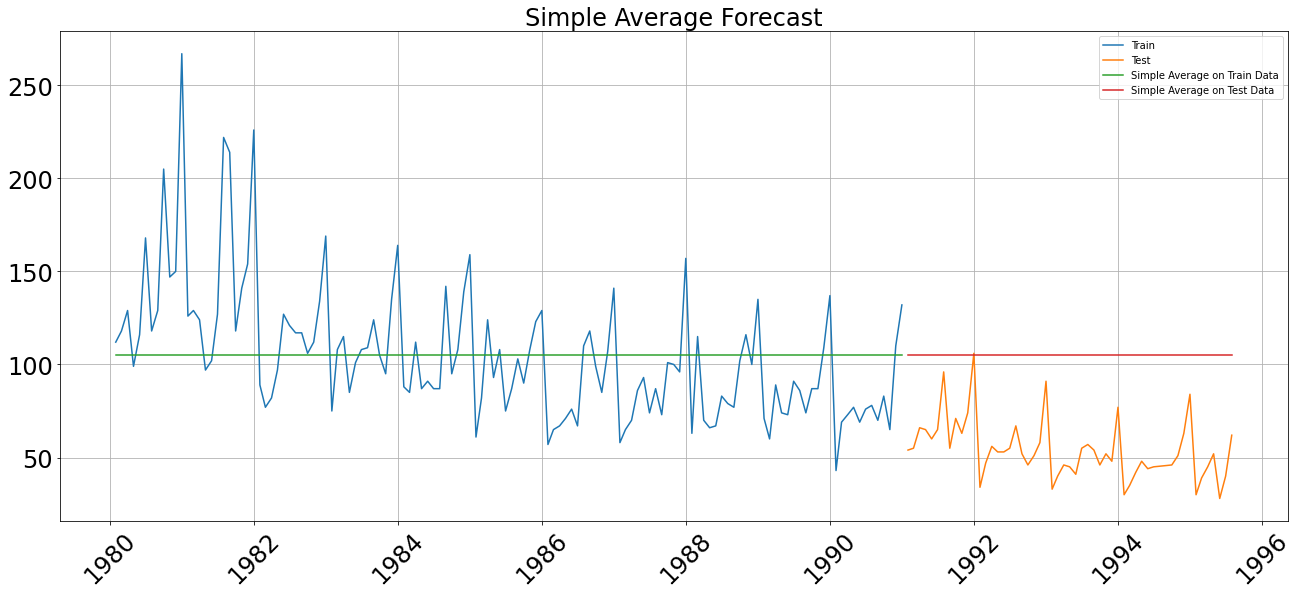

In [245]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Train Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.title("Simple Average Forecast",fontsize=24)
plt.grid();

Model Evaluation by RMSE

In [246]:
## Train Data - RMSE 
rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
print("For Simple Average forecast on the Train Data,  RMSE is %3.3f" %(rmse_model3_train))

## Test Data - RMSE 
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Train Data,  RMSE is 36.034
For Simple Average forecast on the Test Data,  RMSE is 53.461


In [247]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    15.268955
NaiveModel          79.718773
SimpleAverageModel  53.460570

## Model 4: Moving Average(MA)

In [248]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [249]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

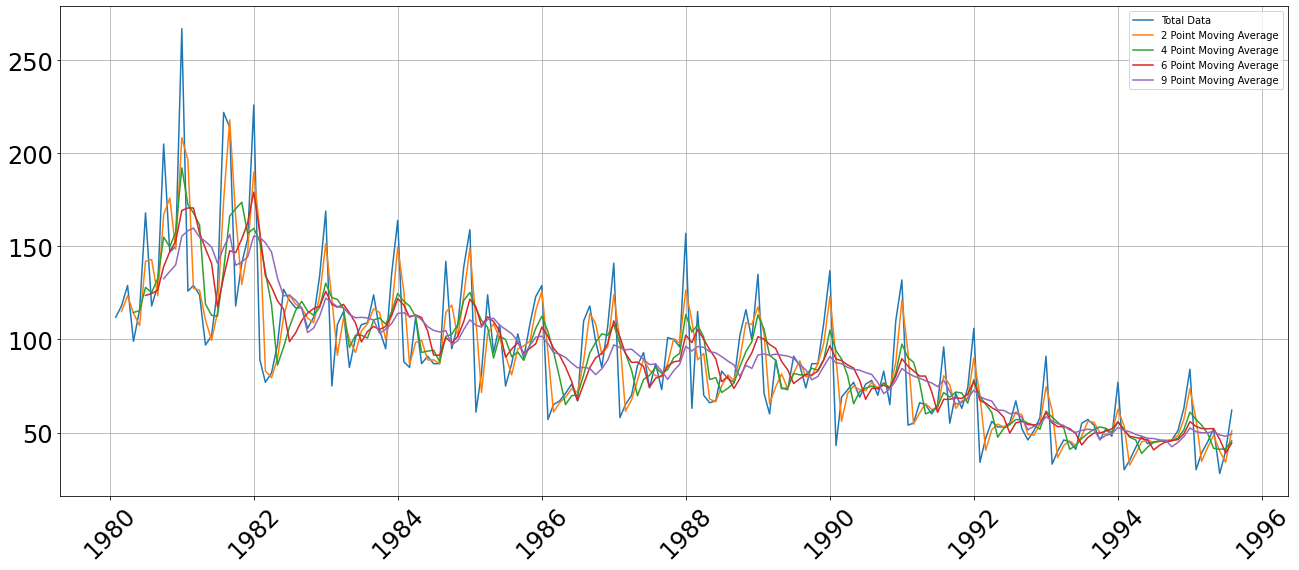

In [250]:
plt.plot(MovingAverage['Rose'], label='Total Data')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc = 'best')
plt.grid();

In [251]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

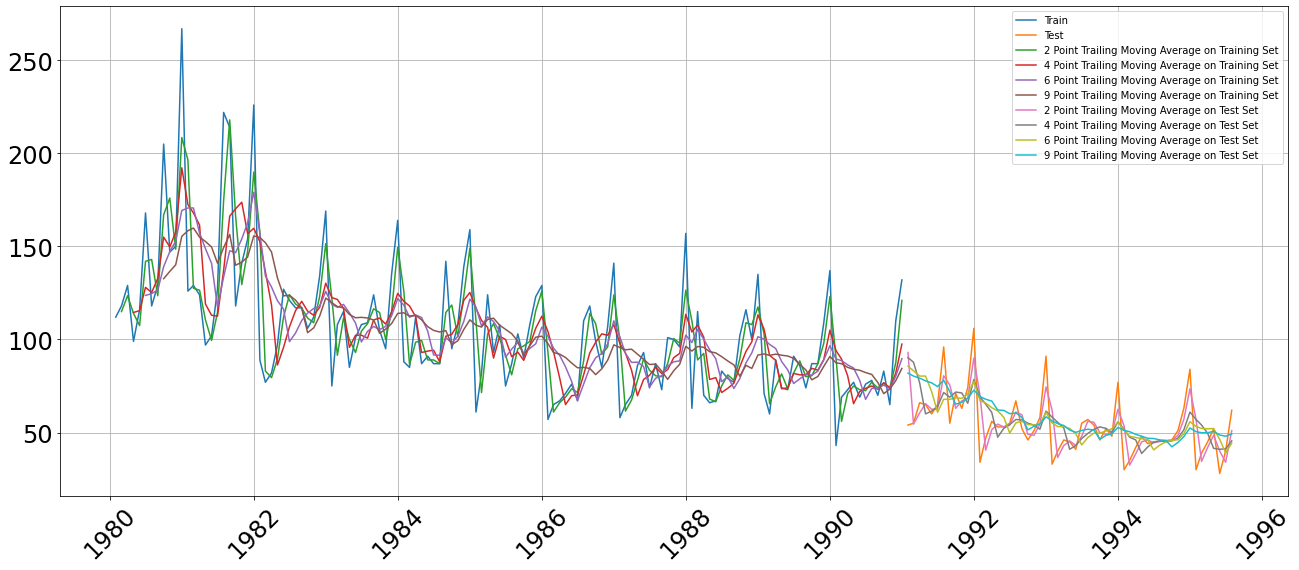

In [252]:
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc = 'best')
plt.grid();

Model Evaluation by RMSE

In [253]:
## Train Data - RMSE --> 2 point Trailing MA

rmse_model4_train_2 = metrics.mean_squared_error(train.iloc[1:],trailing_MovingAverage_train['Trailing_2'].dropna(),squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_train_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_train_4 = metrics.mean_squared_error(train.iloc[3:],trailing_MovingAverage_train['Trailing_4'].dropna(),squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_train_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_train_6 = metrics.mean_squared_error(train.iloc[5:],trailing_MovingAverage_train['Trailing_6'].dropna(),squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_train_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_train_9 = metrics.mean_squared_error(train.iloc[8:],trailing_MovingAverage_train['Trailing_9'].dropna(),squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_train_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 19.466
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 25.972
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 28.462
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 30.230 


In [254]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 14.728 


In [255]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             15.268955
NaiveModel                   79.718773
SimpleAverageModel           53.460570
2pointTrailingMovingAverage  11.529278
4pointTrailingMovingAverage  14.451403
6pointTrailingMovingAverage  14.566327
9pointTrailingMovingAverage  14.727630

### Model 1 to Model 4 Plots

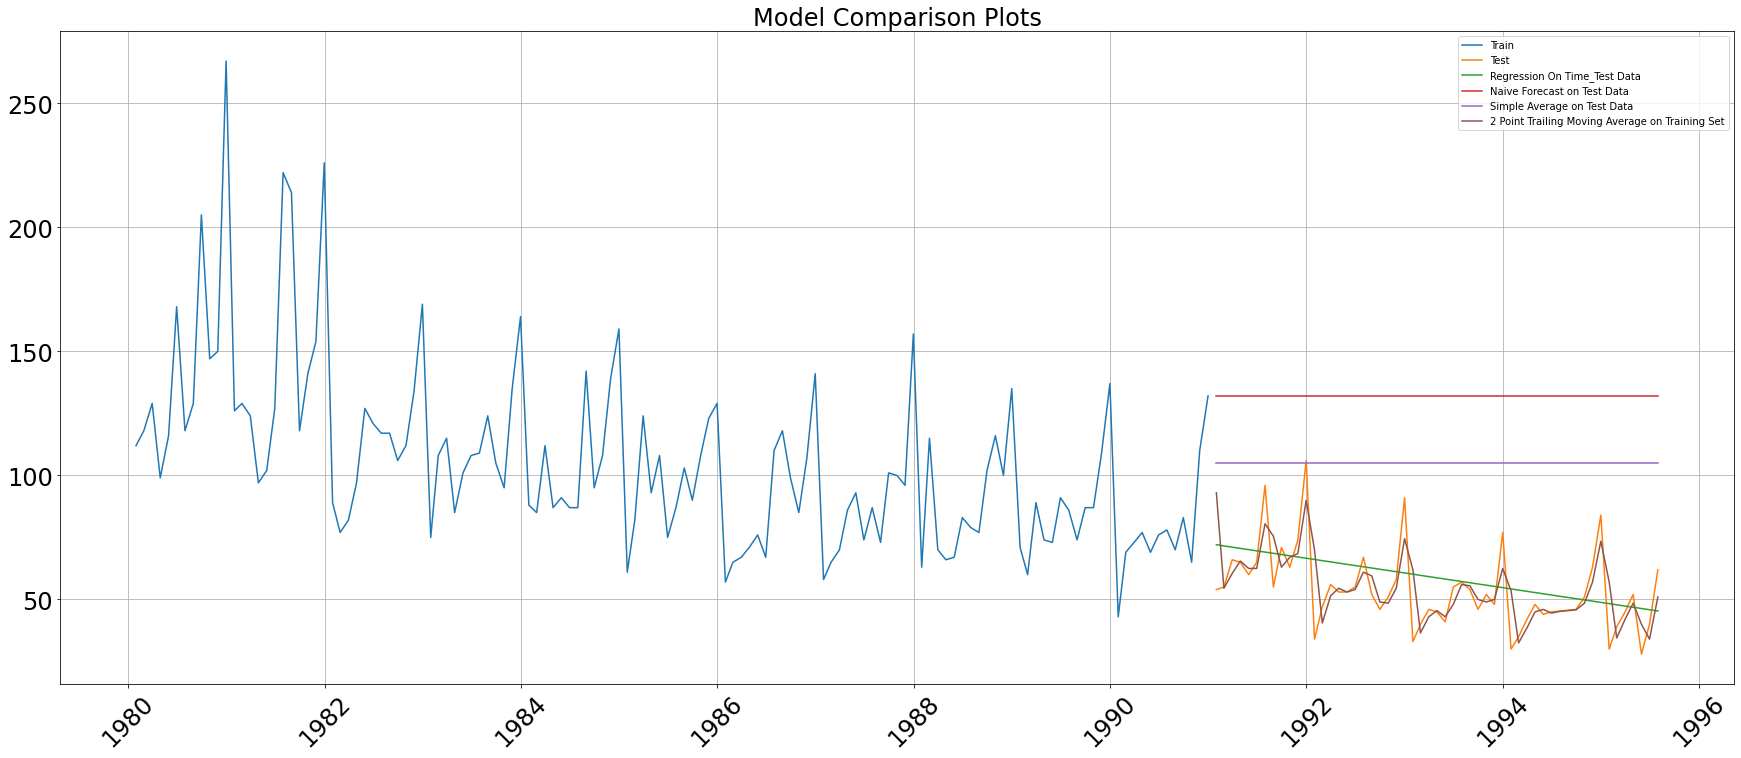

In [256]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.title("Model Comparison Plots",fontsize=24)
plt.grid();

### Model 5: Simple Exponential Smoothing

#### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

In [257]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

import warnings
warnings.filterwarnings('ignore')

#### StatsModel Method 

In [258]:
SES_train = train.copy()
SES_test = test.copy()
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [259]:
model_SES_autofit = model_SES.fit(optimized=True)

In [260]:
model_SES_autofit.params

{'smoothing_level': 0.09874989825614361,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702255613862,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [261]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.104999
1991-02-28  55.0  87.104999
1991-03-31  66.0  87.104999
1991-04-30  65.0  87.104999
1991-05-31  60.0  87.104999

In [262]:
SES_train.head()

Rose     predict
Time_Stamp                   
1980-01-31  112.0  134.387023
1980-02-29  118.0  132.176306
1980-03-31  129.0  130.776398
1980-04-30   99.0  130.600978
1980-05-31  116.0  127.480385

In [263]:
SES_train.shape

(132, 2)

In [264]:
SES_test.shape

(55, 2)

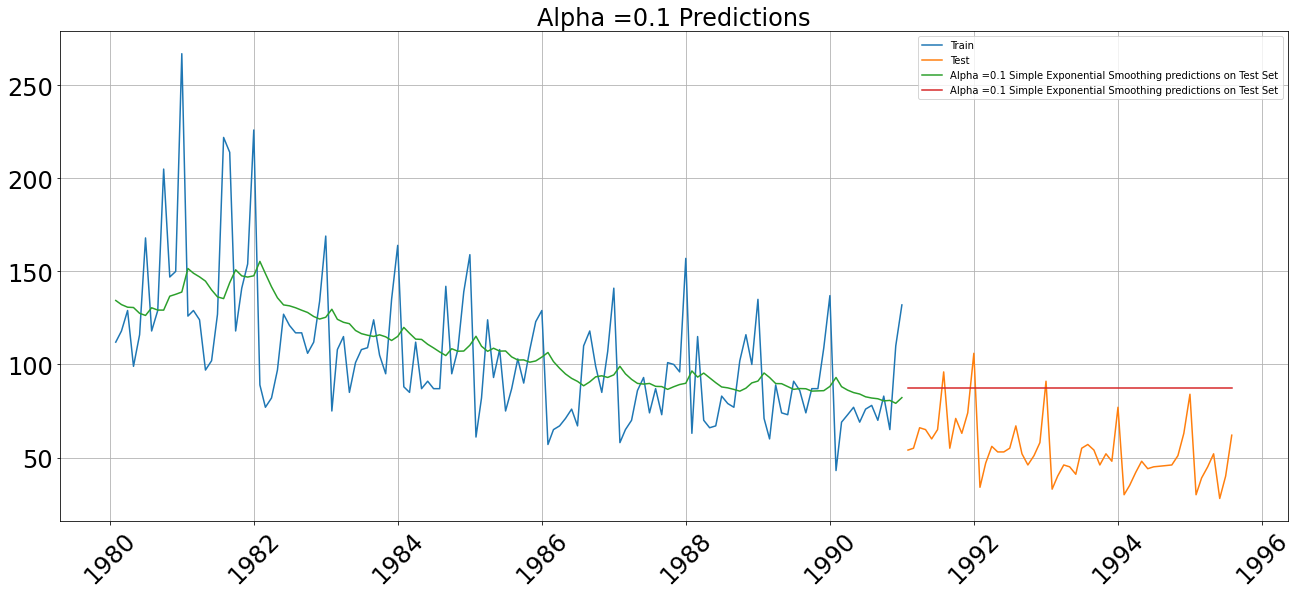

In [265]:
## Plotting on both the Training and Test data


plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict'], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.1 Predictions',fontsize=24);

Model Evaluation for  𝛼  = 0.1 : Simple Exponential Smoothing

In [266]:
## Train Data

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict'],squared=False)
print("For Alpha =0.1 Simple Exponential Smoothing Model forecast on the Train Data, RMSE is %3.3f" %(rmse_model5_train_1))

## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.1 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.1 Simple Exponential Smoothing Model forecast on the Train Data, RMSE is 31.501
For Alpha =0.1 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [267]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                      15.268955
NaiveModel                            79.718773
SimpleAverageModel                    53.460570
2pointTrailingMovingAverage           11.529278
4pointTrailingMovingAverage           14.451403
6pointTrailingMovingAverage           14.566327
9pointTrailingMovingAverage           14.727630
Alpha=0.1,SimpleExponentialSmoothing  36.796242

#### Brute Force Method

We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [268]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

Setting different alpha values to find the least RMSE value

In [269]:
for i in np.arange(0.01,0.2,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [270]:
round(resultsDf_6.sort_values(by=['Test RMSE'],ascending=True),2)

Alpha Values  Train RMSE  Test RMSE
6           0.07       32.05      36.44
7           0.08       31.94      36.46
5           0.06       32.21      36.58
8           0.09       31.86      36.60
9           0.10       31.82      36.83
4           0.05       32.45      37.01
10          0.11       31.79      37.12
11          0.12       31.78      37.46
12          0.13       31.78      37.84
3           0.04       32.81      37.96
13          0.14       31.79      38.27
14          0.15       31.81      38.72
15          0.16       31.84      39.21
16          0.17       31.87      39.72
2           0.03       33.35      39.90
17          0.18       31.90      40.25
18          0.19       31.94      40.80
1           0.02       34.20      43.71
0           0.01       35.46      50.61

In [271]:
SES_test

Rose    predict  (predict, 0.01)  (predict, 0.02)  \
Time_Stamp                                                            
1991-01-31   54.000000  87.104999       101.944599        94.621211   
1991-02-28   55.000000  87.104999       101.944599        94.621211   
1991-03-31   66.000000  87.104999       101.944599        94.621211   
1991-04-30   65.000000  87.104999       101.944599        94.621211   
1991-05-31   60.000000  87.104999       101.944599        94.621211   
1991-06-30   65.000000  87.104999       101.944599        94.621211   
1991-07-31   96.000000  87.104999       101.944599        94.621211   
1991-08-31   55.000000  87.104999       101.944599        94.621211   
1991-09-30   71.000000  87.104999       101.944599        94.621211   
1991-10-31   63.000000  87.104999       101.944599        94.621211   
1991-11-30   74.000000  87.104999       101.944599        94.621211   
1991-12-31  106.000000  87.104999       101.944599        94.621211   
1992-01-31   34.000000  87.104999       101.944599        94.621211   
1992-02-29   47.000000  87.104999       101.944599        94.621211   
1992-03-31   56.000000  87.104999       101.944599        94.621211   
1992-04-30   53.000000  87.104999       101.944599        94.621211   
1992-05-31   53.000000  87.104999       101.944599        94.621211   
1992-06-30   55.000000  87.104999       101.944599        94.621211   
1992-07-31   67.000000  87.104999       101.944599        94.621211   
1992-08-31   52.000000  87.104999       101.944599        94.621211   
1992-09-30   46.000000  87.104999       101.944599        94.621211   
1992-10-31   51.000000  87.104999       101.944599        94.621211   
1992-11-30   58.000000  87.104999       101.944599        94.621211   
1992-12-31   91.000000  87.104999       101.944599        94.621211   
1993-01-31   33.000000  87.104999       101.944599        94.621211   
1993-02-28   40.000000  87.104999       101.944599        94.621211   
1993-03-31   46.000000  87.104999       101.944599        94.621211   
1993-04-30   45.000000  87.104999       101.944599        94.621211   
1993-05-31   41.000000  87.104999       101.944599        94.621211   
1993-06-30   55.000000  87.104999       101.944599        94.621211   
1993-07-31   57.000000  87.104999       101.944599        94.621211   
1993-08-31   54.000000  87.104999       101.944599        94.621211   
1993-09-30   46.000000  87.104999       101.944599        94.621211   
1993-10-31   52.000000  87.104999       101.944599        94.621211   
1993-11-30   48.000000  87.104999       101.944599        94.621211   
1993-12-31   77.000000  87.104999       101.944599        94.621211   
1994-01-31   30.000000  87.104999       101.944599        94.621211   
1994-02-28   35.000000  87.104999       101.944599        94.621211   
1994-03-31   42.000000  87.104999       101.944599        94.621211   
1994-04-30   48.000000  87.104999       101.944599        94.621211   
1994-05-31   44.000000  87.104999       101.944599        94.621211   
1994-06-30   45.000000  87.104999       101.944599        94.621211   
1994-07-31   45.333333  87.104999       101.944599        94.621211   
1994-08-31   45.666667  87.104999       101.944599        94.621211   
1994-09-30   46.000000  87.104999       101.944599        94.621211   
1994-10-31   51.000000  87.104999       101.944599        94.621211   
1994-11-30   63.000000  87.104999       101.944599        94.621211   
1994-12-31   84.000000  87.104999       101.944599        94.621211   
1995-01-31   30.000000  87.104999       101.944599        94.621211   
1995-02-28   39.000000  87.104999       101.944599        94.621211   
1995-03-31   45.000000  87.104999       101.944599        94.621211   
1995-04-30   52.000000  87.104999       101.944599        94.621211   
1995-05-31   28.000000  87.104999       101.944599        94.621211   
1995-06-30   40.000000  87.104999       101.944599        94.621211   
1995-07-31   62.000000  87.104999       10

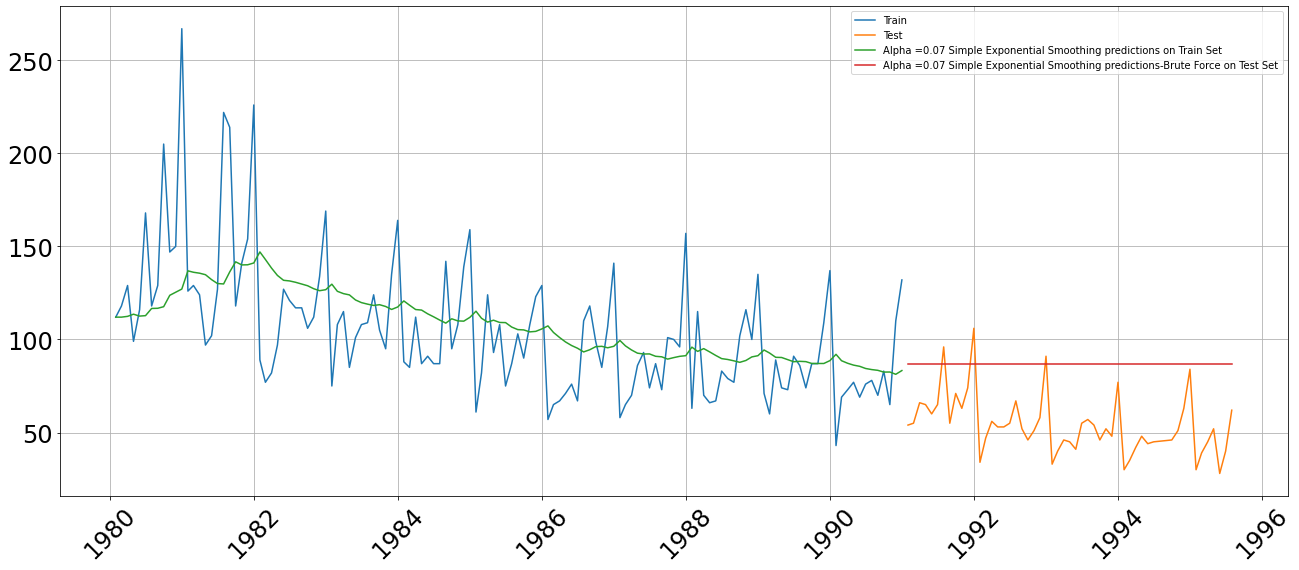

In [272]:
## Plotting on both the Training and Test data

plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict',0.06999999999999999], label='Alpha =0.07 Simple Exponential Smoothing predictions on Train Set')

plt.plot(SES_test['predict', 0.06999999999999999], label='Alpha =0.07 Simple Exponential Smoothing predictions-Brute Force on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

In [273]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.07,SimpleExponentialSmoothing-Brute_Force'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                                   15.268955
NaiveModel                                         79.718773
SimpleAverageModel                                 53.460570
2pointTrailingMovingAverage                        11.529278
4pointTrailingMovingAverage                        14.451403
6pointTrailingMovingAverage                        14.566327
9pointTrailingMovingAverage                        14.727630
Alpha=0.1,SimpleExponentialSmoothing               36.796242
Alpha=0.07,SimpleExponentialSmoothing-Brute_Force  36.435772

## Model 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

#### Holt - ETS(A, A, N) - Holt's linear method with additive errors

#### Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

#### StatsModel Method 

In [274]:
DES_train = train.copy()
DES_test = test.copy()

In [275]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train)
# Fitting the model
model_DES_autofit = model_DES.fit(optimized=True)

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES_autofit.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0001321339938406504, 'smoothing_trend': 1.0513882039253742e-16, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 136.22441775313408, 'initial_trend': -0.4786757879461521, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [276]:
model_DES_autofit.fittedvalues

Time_Stamp
1980-01-31    135.745742
1980-02-29    135.263929
1980-03-31    134.782972
1980-04-30    134.303532
1980-05-31    133.820191
                 ...    
1990-08-31     74.951427
1990-09-30     74.472097
1990-10-31     73.994548
1990-11-30     73.514684
1990-12-31     73.040829
Length: 132, dtype: float64

In [277]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_train['predict'] = model_DES_autofit.fittedvalues
DES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  72.569944
1991-02-28  55.0  72.091268
1991-03-31  66.0  71.612593
1991-04-30  65.0  71.133917
1991-05-31  60.0  70.655241

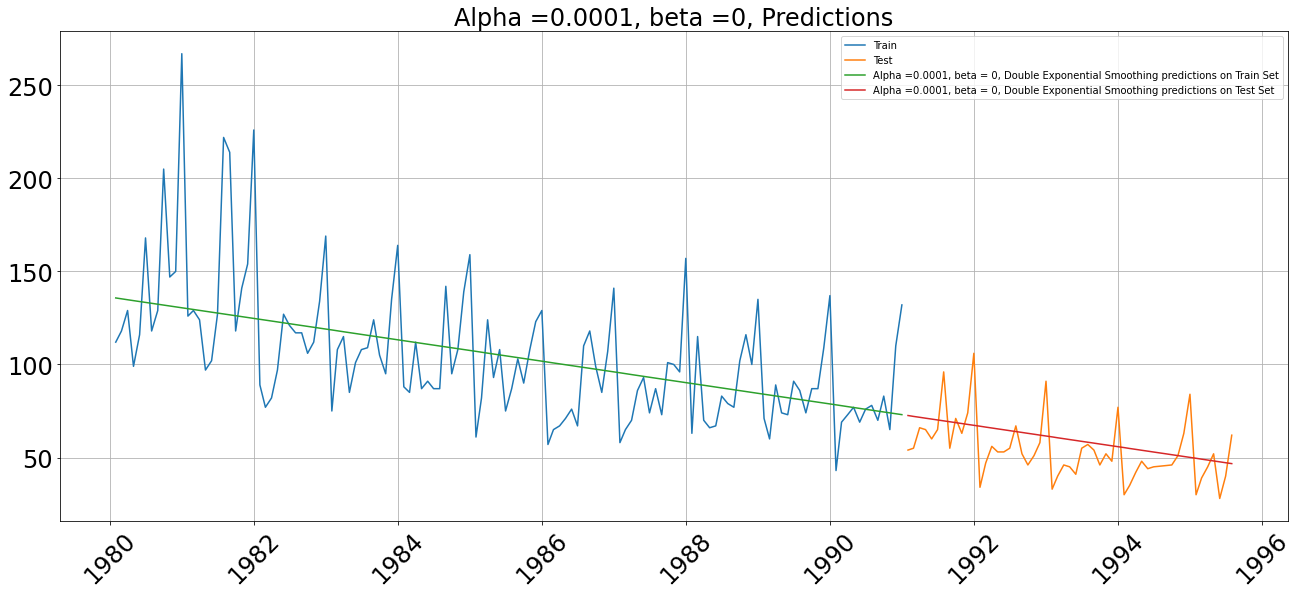

In [278]:
## Plotting on both the Training and Test data


plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_train['predict'], label='Alpha =0.0001, beta = 0, Double Exponential Smoothing predictions on Train Set')
plt.plot(DES_test['predict'], label='Alpha =0.0001, beta = 0, Double Exponential Smoothing predictions on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0001, beta =0, Predictions',fontsize=24);

In [423]:
## Train Data

rmse_model6_train_1 = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict'],squared=False)
print("For Alpha =0.0001, beta = 0, Double Exponential Smoothing Model forecast on the Train Data, RMSE is %3.3f" %(rmse_model6_train_1))

## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha =0.0001, beta = 0, Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))



For Alpha =0.0001, beta = 0, Double Exponential Smoothing Model forecast on the Train Data, RMSE is 30.731
For Alpha =0.0001, beta = 0, Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.569


In [280]:
resultsDf_6_3 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['Alpha=0.0001,beta = 0, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_3])
resultsDf

Test RMSE
RegressionOnTime                                   15.268955
NaiveModel                                         79.718773
SimpleAverageModel                                 53.460570
2pointTrailingMovingAverage                        11.529278
4pointTrailingMovingAverage                        14.451403
6pointTrailingMovingAverage                        14.566327
9pointTrailingMovingAverage                        14.727630
Alpha=0.1,SimpleExponentialSmoothing               36.796242
Alpha=0.07,SimpleExponentialSmoothing-Brute_Force  36.435772
Alpha=0.0001,beta = 0, DoubleExponentialSmoothing  15.569001

#### Brute Force Method 

In [281]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [282]:
for i in np.arange(0.03,0.05,0.01):
    for j in np.arange(0.03,0.05,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [283]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
4          0.04         0.04   61.520373  14.895847
6          0.05         0.03   57.563568  15.574880
3          0.04         0.03   67.637624  17.909928
7          0.05         0.04   52.885737  19.755029
5          0.04         0.05   57.472620  21.091761

In [284]:
DES_test

Rose    predict  (predict, 0.03, 0.03)  \
Time_Stamp                                                 
1991-01-31   54.000000  72.569944              66.097578   
1991-02-28   55.000000  72.091268              64.754903   
1991-03-31   66.000000  71.612593              63.412227   
1991-04-30   65.000000  71.133917              62.069552   
1991-05-31   60.000000  70.655241              60.726877   
1991-06-30   65.000000  70.176565              59.384201   
1991-07-31   96.000000  69.697889              58.041526   
1991-08-31   55.000000  69.219214              56.698851   
1991-09-30   71.000000  68.740538              55.356175   
1991-10-31   63.000000  68.261862              54.013500   
1991-11-30   74.000000  67.783186              52.670824   
1991-12-31  106.000000  67.304510              51.328149   
1992-01-31   34.000000  66.825835              49.985474   
1992-02-29   47.000000  66.347159              48.642798   
1992-03-31   56.000000  65.868483              47.300123   
1992-04-30   53.000000  65.389807              45.957448   
1992-05-31   53.000000  64.911131              44.614772   
1992-06-30   55.000000  64.432456              43.272097   
1992-07-31   67.000000  63.953780              41.929422   
1992-08-31   52.000000  63.475104              40.586746   
1992-09-30   46.000000  62.996428              39.244071   
1992-10-31   51.000000  62.517753              37.901396   
1992-11-30   58.000000  62.039077              36.558720   
1992-12-31   91.000000  61.560401              35.216045   
1993-01-31   33.000000  61.081725              33.873369   
1993-02-28   40.000000  60.603049              32.530694   
1993-03-31   46.000000  60.124374              31.188019   
1993-04-30   45.000000  59.645698              29.845343   
1993-05-31   41.000000  59.167022              28.502668   
1993-06-30   55.000000  58.688346              27.159993   
1993-07-31   57.000000  58.209670              25.817317   
1993-08-31   54.000000  57.730995              24.474642   
1993-09-30   46.000000  57.252319              23.131967   
1993-10-31   52.000000  56.773643              21.789291   
1993-11-30   48.000000  56.294967              20.446616   
1993-12-31   77.000000  55.816291              19.103941   
1994-01-31   30.000000  55.337616              17.761265   
1994-02-28   35.000000  54.858940              16.418590   
1994-03-31   42.000000  54.380264              15.075914   
1994-04-30   48.000000  53.901588              13.733239   
1994-05-31   44.000000  53.422913              12.390564   
1994-06-30   45.000000  52.944237              11.047888   
1994-07-31   45.333333  52.465561               9.705213   
1994-08-31   45.666667  51.986885               8.362538   
1994-09-30   46.000000  51.508209               7.019862   
1994-10-31   51.000000  51.029534               5.677187   
1994-11-30   63.000000  50.550858               4.334512   
1994-12-31   84.000000  50.072182               2.991836   
1995-01-31   30.000000  49.593506               1.649161   
1995-02-28   39.000000  49.114830               0.306486   
1995-03-31   45.000000  48.636155              -1.036190   
1995-04-30   52.000000  48.157479              -2.378865   
1995-05-31   28.000000  47.678803              -3.721540   
1995-06-30   40.000000  47.200127              -5.064216   
1995-07-31   62.000000  46.721452              -6.406891   

            (predict, 0.03, 0.04)  (predict, 0.03, 0.05)  \
Time_Stamp                                                 
1991-01-31              51.494395              50.245775   
1991-02-28              50.339617              49.648283   
1991-03-31              49.184839              49.050791   
1991-04-30              48.030061              48.453299   
1991-05-31              46.875283              47.855807   
1991-06-30              45.720505              47.258315   
1991-07-31              44.565727              46.660823   
1991-08-31              43.410949              46.063331 

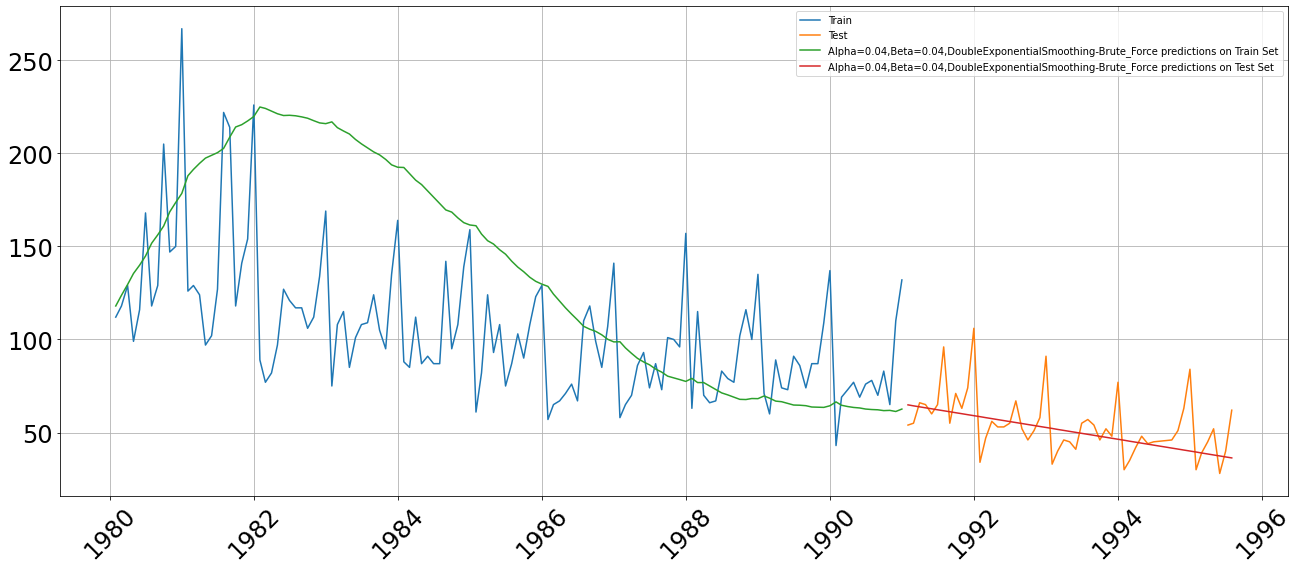

In [285]:
## Plotting on both the Training and Test data


plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_train['predict', 0.04, 0.04], label='Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing-Brute_Force predictions on Train Set')
plt.plot(DES_test['predict', 0.04, 0.04], label='Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing-Brute_Force predictions on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

In [286]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing-Brute_Force'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.796242
Alpha=0.07,SimpleExponentialSmoothing-Brute_Force   36.435772
Alpha=0.0001,beta = 0, DoubleExponentialSmoothing   15.569001
Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing...  14.895847

## Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

#### StatsModel Method 

In [287]:
TES_train = train.copy()
TES_test = test.copy()

In [288]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [289]:
model_TES_autofit = model_TES.fit(optimized=True)

In [290]:
model_TES_autofit.params

{'smoothing_level': 0.06467234615091698,
 'smoothing_trend': 0.05315920636255018,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 50.880912909225756,
 'initial_trend': -0.31656840824205823,
 'initial_seasons': array([2.21583703, 2.51439498, 2.74693025, 2.40118428, 2.69936273,
        2.94338111, 3.2353888 , 3.44052906, 3.26420741, 3.19365239,
        3.72269442, 5.13435788]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [291]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_test.head()

Rose  auto_predict
Time_Stamp                    
1991-01-31  54.0     56.755640
1991-02-28  55.0     64.211013
1991-03-31  66.0     69.939833
1991-04-30  65.0     60.953618
1991-05-31  60.0     68.316934

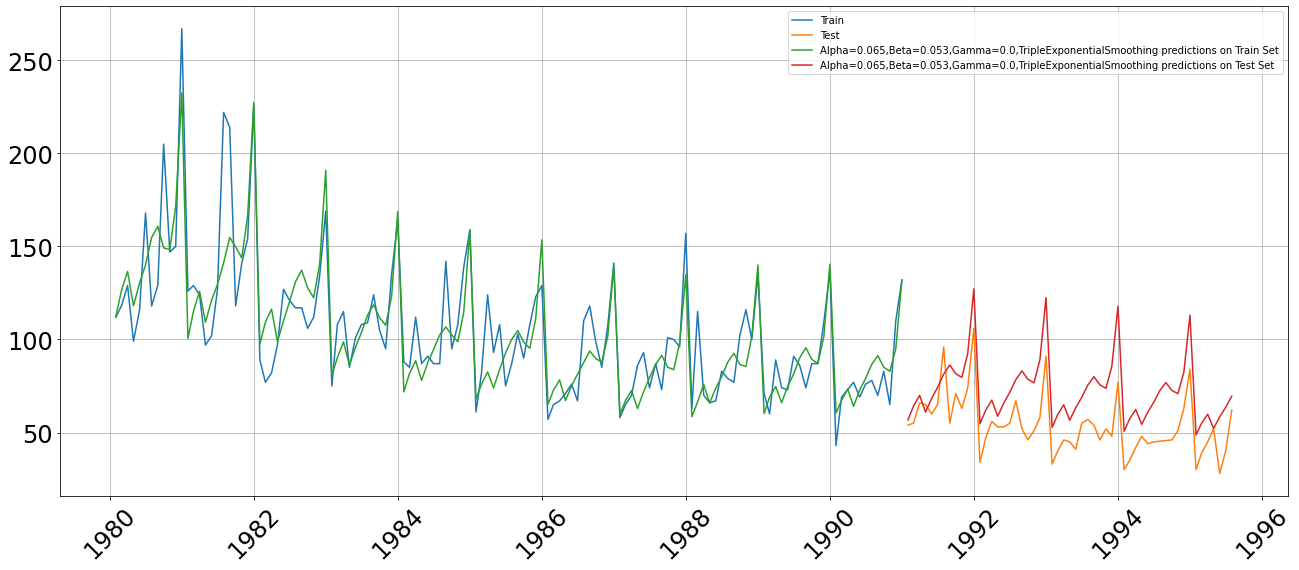

In [292]:
## Plotting on both the Training and Test using autofit


plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.065,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing predictions on Train Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.065,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

In [293]:
## Train Data

rmse_model7_train_1 = metrics.mean_squared_error(TES_train['Rose'],TES_train['auto_predict'],squared=False)
print("For Alpha=0.065,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Train Data,  RMSE is %3.3f" %(rmse_model7_train_1))

## Test Data

rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.065,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.065,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Train Data,  RMSE is 18.405
For Alpha=0.065,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 21.155


In [294]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['Alpha=0.065,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.796242
Alpha=0.07,SimpleExponentialSmoothing-Brute_Force   36.435772
Alpha=0.0001,beta = 0, DoubleExponentialSmoothing   15.569001
Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing...  14.895847
Alpha=0.065,Beta=0.053,Gamma=0.0,TripleExponent...  21.154772

#### Brute Force Method 

In [295]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [302]:
for i in np.arange(0.1,0.5,0.1):
    for j in np.arange(0.1,0.5,0.1):
        for k in np.arange(0.1,0.5,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=round(i,3),smoothing_trend=round(j,3),smoothing_seasonal=round(k,3),optimized=False,use_brute=True)
            TES_train['predict',round(i,3),round(j,3),round(k,3)] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',round(i,3),round(j,3),round(k,3)] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',round(i,3),round(j,3),round(k,3)],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',round(i,3),round(j,3),round(k,3)],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':round(i,3),'Beta Values':round(j,3),'Gamma Values':round(k,3),
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [303]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
6515          0.01        0.095         0.195   29.096825   8.474348
6514          0.01        0.095         0.190   29.222451   8.483144
6477          0.01        0.090         0.195   29.174857   8.492062
6513          0.01        0.095         0.185   29.351130   8.509061
6476          0.01        0.090         0.190   29.301462   8.511021

In [298]:
TES_test

Rose  auto_predict  (predict, 0.01, 0.01, 0.01)  \
Time_Stamp                                                          
1991-01-31   54.000000     56.755640                    87.460348   
1991-02-28   55.000000     64.211013                    92.767632   
1991-03-31   66.000000     69.939833                   101.210560   
1991-04-30   65.000000     60.953618                    78.588678   
1991-05-31   60.000000     68.316934                    91.368811   
1991-06-30   65.000000     74.268182                   129.036349   
1991-07-31   96.000000     81.389424                    93.804006   
1991-08-31   55.000000     86.287511                   101.961018   
1991-09-30   71.000000     81.616442                   155.983093   
1991-10-31   63.000000     79.608733                   114.145110   
1991-11-30   74.000000     92.512314                   117.703330   
1991-12-31  106.000000    127.201809                   205.278148   
1992-01-31   34.000000     54.727530                    86.180314   
1992-02-29   47.000000     61.909639                    91.408265   
1992-03-31   56.000000     67.425625                    99.725662   
1992-04-30   53.000000     58.755864                    77.434262   
1992-05-31   53.000000     65.846263                    90.025019   
1992-06-30   55.000000     71.574166                   127.136239   
1992-07-31   67.000000     78.428140                    92.421009   
1992-08-31   52.000000     83.138466                   100.455908   
1992-09-30   46.000000     78.628780                   153.677694   
1992-10-31   51.000000     76.685648                   112.455988   
1992-11-30   58.000000     89.105008                   115.959403   
1992-12-31   91.000000    122.502437                   202.232927   
1993-01-31   33.000000     52.699420                    84.900280   
1993-02-28   40.000000     59.608266                    90.048898   
1993-03-31   46.000000     64.911416                    98.240763   
1993-04-30   45.000000     56.558109                    76.279847   
1993-05-31   41.000000     63.375592                    88.681226   
1993-06-30   55.000000     68.880150                   125.236129   
1993-07-31   57.000000     75.466855                    91.038011   
1993-08-31   54.000000     79.989421                    98.950799   
1993-09-30   46.000000     75.641118                   151.372296   
1993-10-31   52.000000     73.762564                   110.766866   
1993-11-30   48.000000     85.697703                   114.215476   
1993-12-31   77.000000    117.803065                   199.187705   
1994-01-31   30.000000     50.671310                    83.620246   
1994-02-28   35.000000     57.306892                    88.689531   
1994-03-31   42.000000     62.397207                    96.755865   
1994-04-30   48.000000     54.360355                    75.125431   
1994-05-31   44.000000     60.904921                    87.337434   
1994-06-30   45.000000     66.186134                   123.336019   
1994-07-31   45.333333     72.505570                    89.655014   
1994-08-31   45.666667     76.840375                    97.445690   
1994-09-30   46.000000     72.653456                   149.066897   
1994-10-31   51.000000     70.839480                   109.077744   
1994-11-30   63.000000     82.290397                   112.471549   
1994-12-31   84.000000    113.103693                   196.142484   
1995-01-31   30.000000     48.643200                    82.340213   
1995-02-28   39.000000     55.005518                    87.330164   
1995-03-31   45.000000     59.882998                    95.270967   
1995-04-30   52.000000     52.162600                    73.971015   
1995-05-31   28.000000     58.434249                    85.993642   
1995-06-30   40.000000     63.492117                   121.435908   
1995-07-31   62.000000     69.544285                    88.272016   

            (predict, 0.01, 0.01, 0.015)  (predict, 0.01, 0.01, 0.02)  \
Time_Stamp 

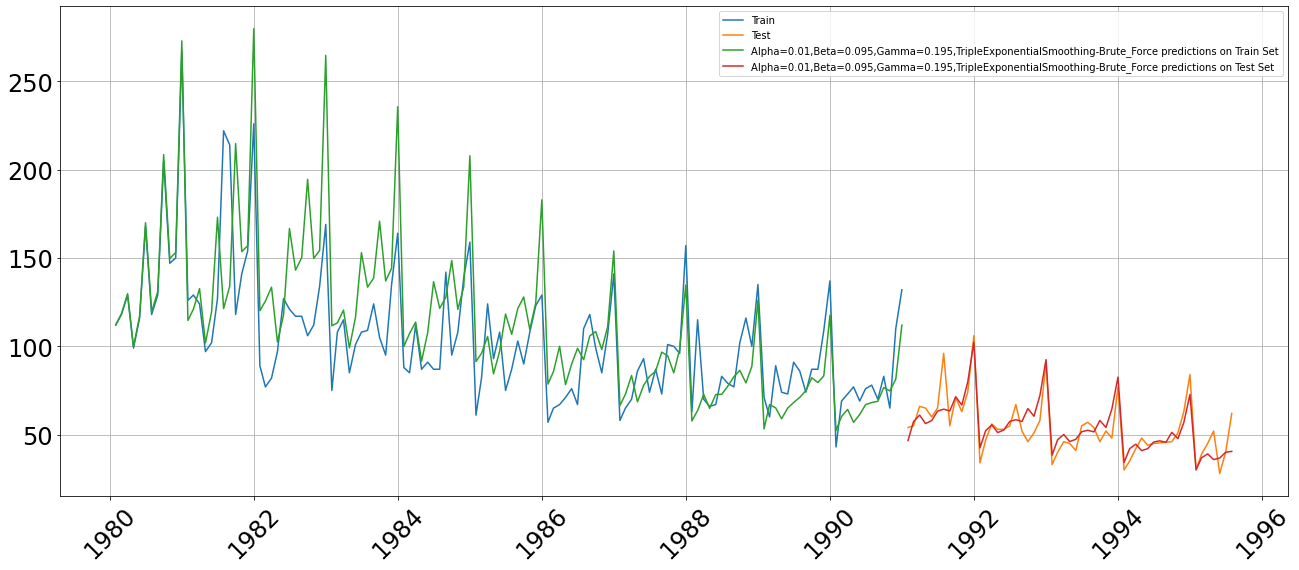

In [304]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_train['predict', 0.01, 0.095, 0.195], label='Alpha=0.01,Beta=0.095,Gamma=0.195,TripleExponentialSmoothing-Brute_Force predictions on Train Set')
plt.plot(TES_test['predict', 0.01, 0.095, 0.195], label='Alpha=0.01,Beta=0.095,Gamma=0.195,TripleExponentialSmoothing-Brute_Force predictions on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

In [305]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.01,Beta=0.095,Gamma=0.195,TripleExponentialSmoothing-Brute_Force'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.796242
Alpha=0.07,SimpleExponentialSmoothing-Brute_Force   36.435772
Alpha=0.0001,beta = 0, DoubleExponentialSmoothing   15.569001
Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing...  14.895847
Alpha=0.065,Beta=0.053,Gamma=0.0,TripleExponent...  21.154772
Alpha=0.01,Beta=0.095,Gamma=0.195,TripleExponen...   8.474348

In [306]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.01,Beta=0.095,Gamma=0.195,TripleExponen...   8.474348
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing...  14.895847
RegressionOnTime                                    15.268955
Alpha=0.0001,beta = 0, DoubleExponentialSmoothing   15.569001
Alpha=0.065,Beta=0.053,Gamma=0.0,TripleExponent...  21.154772
Alpha=0.07,SimpleExponentialSmoothing-Brute_Force   36.435772
Alpha=0.1,SimpleExponentialSmoothing                36.796242
SimpleAverageModel                                  53.460570
NaiveModel                                          79.718773

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters 
$\alpha$ = 0.01,

$\beta$ = 0.095 and 

$\gamma$ = 0.195.

#### Model 5 to Model 7 Simple,Double & Triple Exponential  

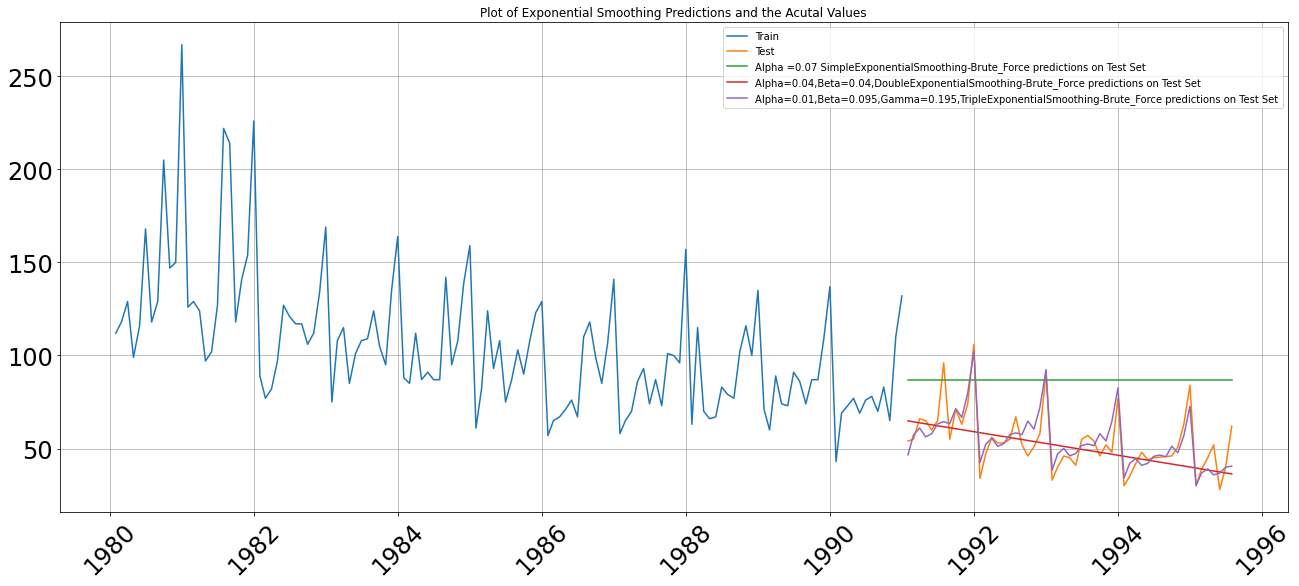

In [307]:
## Plotting on both the Training and Test data


plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.06999999999999999], label='Alpha =0.07 SimpleExponentialSmoothing-Brute_Force predictions on Test Set')

plt.plot(DES_test['predict', 0.04, 0.04], label='Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing-Brute_Force predictions on Test Set')

plt.plot(TES_test['predict', 0.01, 0.095, 0.195], label='Alpha=0.01,Beta=0.095,Gamma=0.195,TripleExponentialSmoothing-Brute_Force predictions on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05. 

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [308]:
from statsmodels.tsa.stattools import adfuller

In [309]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=5).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

The Model is being built on Train Data, ADF test is done on Train dataset

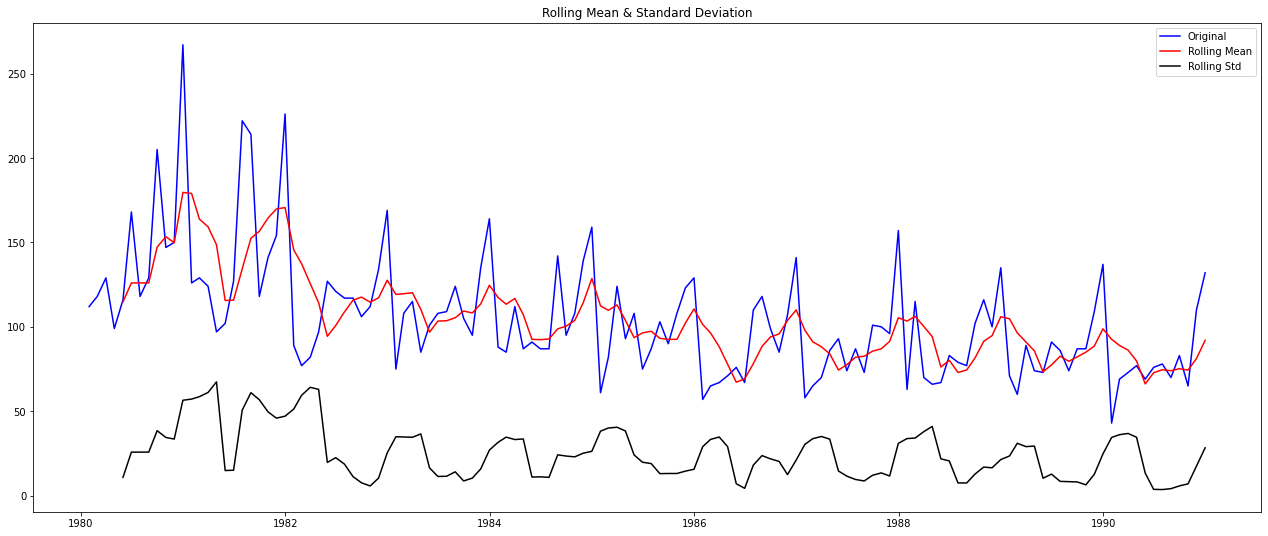

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [310]:
test_stationarity(train['Rose'])

We see that the series is not stationary at $\alpha$ = 0.05, for Train data on which the model is built on

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

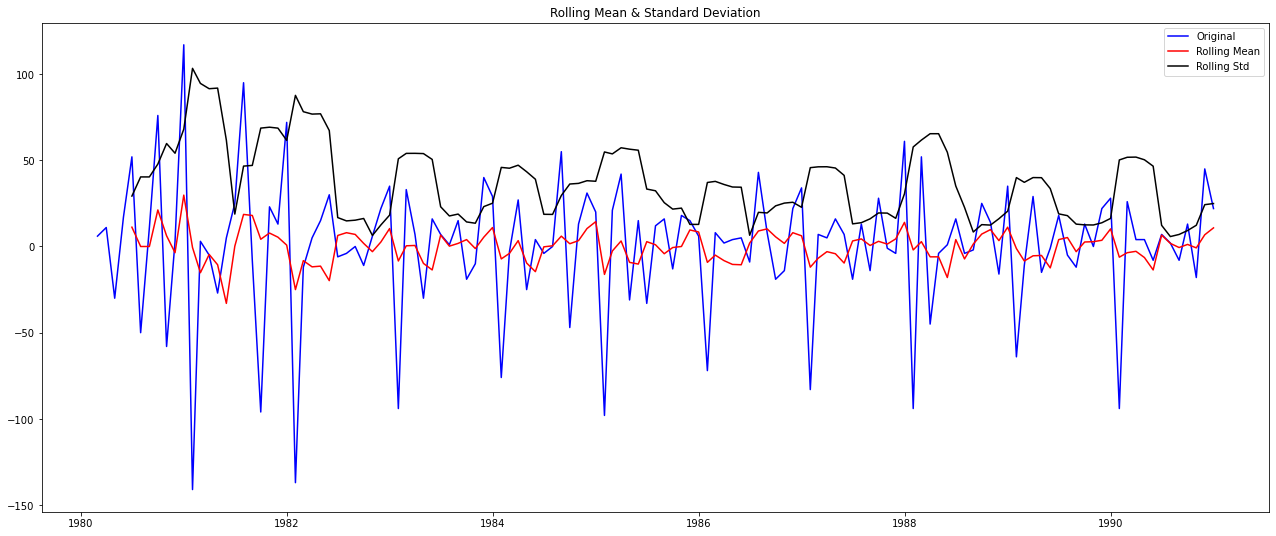

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [311]:
test_stationarity(train['Rose'].diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

Lets look at ACF & PACF Plots

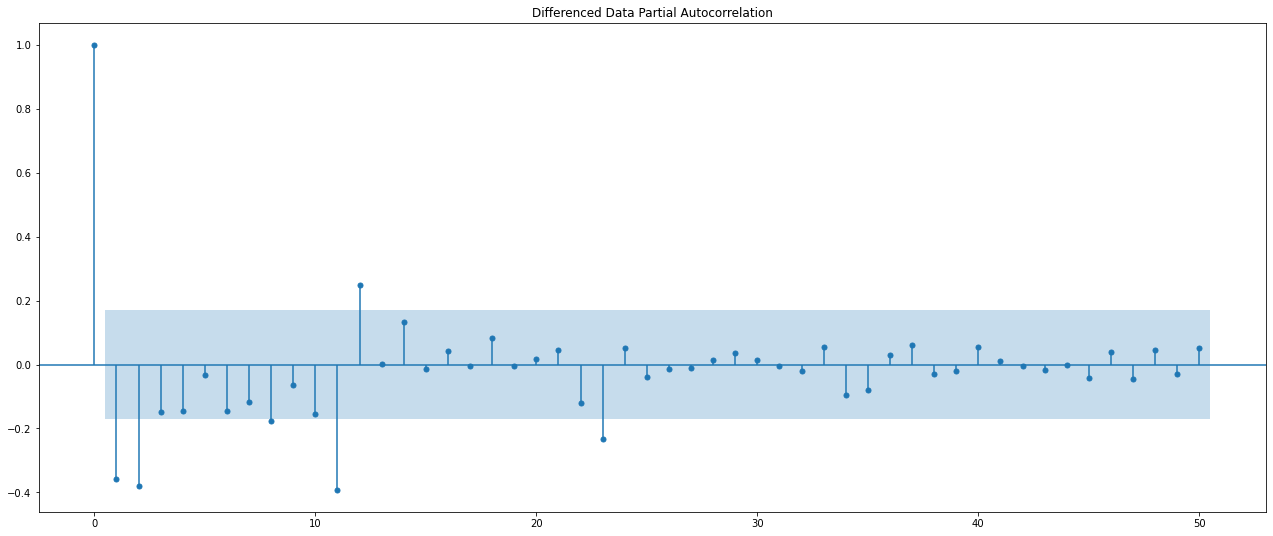

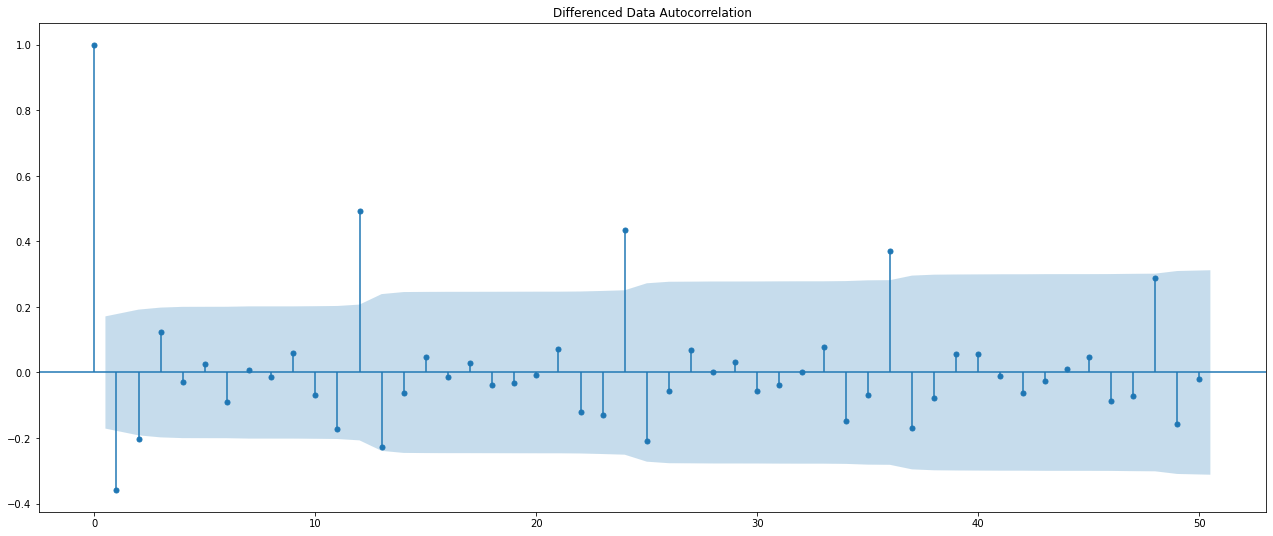

In [313]:
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation', method='ywmle')
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')

plt.show()

### Automated version of the ARIMA

In [312]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [323]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 3
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [324]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [325]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,round(ARIMA_model.aic,2)))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.15
ARIMA(0, 1, 1) - AIC:1280.73
ARIMA(0, 1, 2) - AIC:1276.84
ARIMA(0, 1, 3) - AIC:1278.07
ARIMA(1, 1, 0) - AIC:1319.35
ARIMA(1, 1, 1) - AIC:1277.78
ARIMA(1, 1, 2) - AIC:1277.36
ARIMA(1, 1, 3) - AIC:1279.31
ARIMA(2, 1, 0) - AIC:1300.61
ARIMA(2, 1, 1) - AIC:1279.05
ARIMA(2, 1, 2) - AIC:1279.3
ARIMA(2, 1, 3) - AIC:1281.2
ARIMA(3, 1, 0) - AIC:1299.48
ARIMA(3, 1, 1) - AIC:1279.61
ARIMA(3, 1, 2) - AIC:1280.97
ARIMA(3, 1, 3) - AIC:1273.19


In [326]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
15  (3, 1, 3)  1273.194105
2   (0, 1, 2)  1276.835372
6   (1, 1, 2)  1277.359225
5   (1, 1, 1)  1277.775750
3   (0, 1, 3)  1278.074261
9   (2, 1, 1)  1279.045689
10  (2, 1, 2)  1279.298694
7   (1, 1, 3)  1279.312637
13  (3, 1, 1)  1279.605963
1   (0, 1, 1)  1280.726183
14  (3, 1, 2)  1280.969247
11  (2, 1, 3)  1281.196226
12  (3, 1, 0)  1299.478739
8   (2, 1, 0)  1300.609261
4   (1, 1, 0)  1319.348311
0   (0, 1, 0)  1335.152658

In [327]:
auto_ARIMA = ARIMA(train['Rose'], order=(3,1,3),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.355
Date:                Sun, 13 Nov 2022   AIC                           1273.194
Time:                        16:10:31   BIC                           1296.196
Sample:                    02-29-1980   HQIC                          1282.541
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.548      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7243      0.086     -8.409      0.000      -0.893      -0.555
ar.L2.D.Rose    -0.7217      0.087     -8.33

In [328]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
predicted_auto_ARIMA[0]

array([74.73244466, 75.54738063, 81.70578133, 59.76353648, 70.37239044,
       79.16202336, 58.00985218, 68.85459891, 77.63046834, 56.53640317,
       67.41419968, 76.12039176, 55.06900215, 65.97531064, 74.6107933 ,
       53.60183663, 64.53632339, 73.10122816, 52.13478295, 63.09720395,
       71.59168727, 50.66783803, 61.65795169, 70.08217078, 49.20100134,
       60.21856671, 68.57267905, 47.73427242, 58.77904913, 67.06321244,
       46.2676508 , 57.33939905, 65.5537713 , 44.80113602, 55.89961658,
       64.04435598, 43.3347276 , 54.45970185, 62.53496683, 41.86842509,
       53.01965496, 61.0256042 , 40.40222803, 51.57947603, 59.51626843,
       38.93613593, 50.13916519, 58.00695988, 37.47014836, 48.69872254,
       56.49767889, 36.00426483, 47.2581482 , 54.9884258 , 34.53848489])

In [329]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.990700639612276


In [330]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Automated_ARIMA(3,1,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.796242
Alpha=0.07,SimpleExponentialSmoothing-Brute_Force   36.435772
Alpha=0.0001,beta = 0, DoubleExponentialSmoothing   15.569001
Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing...  14.895847
Alpha=0.065,Beta=0.053,Gamma=0.0,TripleExponent...  21.154772
Alpha=0.01,Beta=0.095,Gamma=0.195,TripleExponen...   8.474348
Automated_ARIMA(3,1,3)                              15.990701

In [331]:
auto_arima_test = test.copy()
auto_arima_test['predict'] = predicted_auto_ARIMA[0]
auto_arima_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  74.732445
1991-02-28  55.0  75.547381
1991-03-31  66.0  81.705781
1991-04-30  65.0  59.763536
1991-05-31  60.0  70.372390

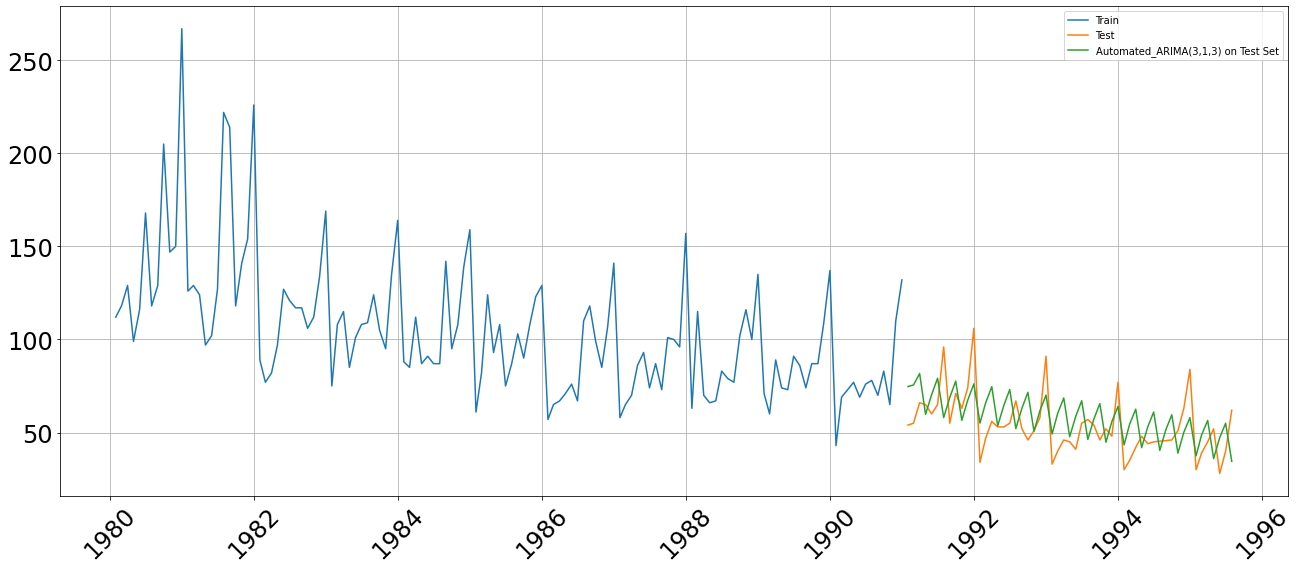

In [332]:
## Plotting on both the Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

#plt.plot(SES_train['predict',0.02], label='Alpha =0.05 Simple Exponential Smoothing predictions on Train Set')

plt.plot(auto_arima_test['predict'], label='Automated_ARIMA(3,1,3) on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

### Automated version of the SARIMA

In [333]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

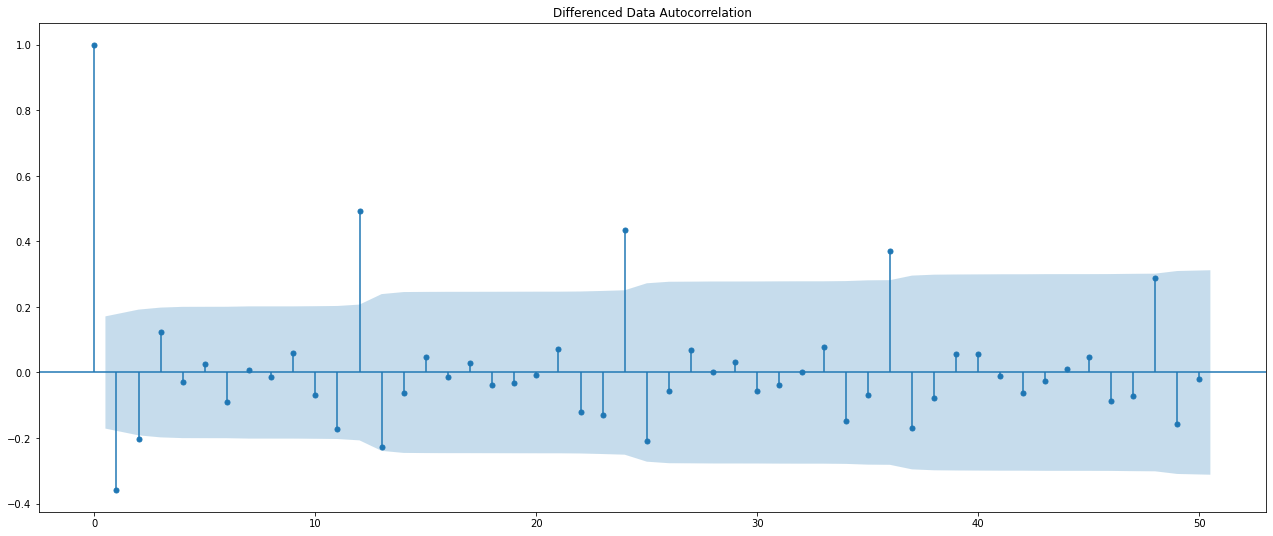

In [334]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')

plt.show()

We see that there can be a seasonality of F = 12. We will run our auto SARIMA models by setting seasonality 12.

### Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

In [338]:
import itertools
p = q = range(0, 4)
d= range(1,2)

P = range(0, 4)
Q = range(0, 4)
D = range(0,1)


pdq_12 = list(itertools.product(p, d, q))

model_pdq_12 = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq_12)):
    print('Model: {}'.format(pdq_12[i]))

for i in range(1,len(model_pdq_12)):
    print('Model: {}'.format(model_pdq_12[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (0, 0, 1, 12)
Model: (0, 0, 2, 12)
Model: (0, 0, 3, 12)
Model: (1, 0, 0, 12)
Model: (1, 0, 1, 12)
Model: (1, 0, 2, 12)
Model: (1, 0, 3, 12)
Model: (2, 0, 0, 12)
Model: (2, 0, 1, 12)
Model: (2, 0, 2, 12)
Model: (2, 0, 3, 12)
Model: (3, 0, 0, 12)
Model: (3, 0, 1, 12)
Model: (3, 0, 2, 12)
Model: (3, 0, 3, 12)


In [339]:
SARIMA_AIC_12 = pd.DataFrame(columns=['param','seasonal', 'AIC','RMSE'])
SARIMA_AIC_12

Empty DataFrame
Columns: [param, seasonal, AIC, RMSE]
Index: []

In [340]:
import statsmodels.api as sm

for param in pdq_12:
    for param_seasonal in model_pdq_12:
        SARIMA_model_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_12 = SARIMA_model_12.fit(maxiter=100)
        predicted_SARIMA = results_SARIMA_12.forecast(steps=len(test))
        RMSE = mean_squared_error(test['Rose'],predicted_SARIMA,squared=False)
        
        print('SARIMA{}x{} - AIC: {} - RMSE: {}'.format(param, param_seasonal, round(results_SARIMA_12.aic,2),round(RMSE,2)))
        SARIMA_AIC_12 = SARIMA_AIC_12.append({'param':param,
                                              'seasonal':param_seasonal ,
                                              'AIC': results_SARIMA_12.aic,
                                               'RMSE':RMSE}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC: 1323.97 - RMSE: 79.72
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC: 1145.42 - RMSE: 69.34
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC: 976.44 - RMSE: 91.98
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC: 3994.72 - RMSE: 175348.57
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC: 1139.92 - RMSE: 64.66
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC: 1116.02 - RMSE: 38.13
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC: 969.69 - RMSE: 51.0
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC: 3801.01 - RMSE: 187468.08
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC: 960.88 - RMSE: 51.59
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC: 962.88 - RMSE: 51.67
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC: 955.57 - RMSE: 46.82
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC: 5644.47 - RMSE: 554889712704.11
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC: 850.75 - RMSE: 38.28
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC: 851.75 - RMSE: 34.48
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC: 850.53 - RMSE: 31.29
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC: 3843.91 - RMSE: 1231770701353.5
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC: 

SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC: 925.98 - RMSE: 41.77
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC: 927.84 - RMSE: 41.34
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC: 5729.36 - RMSE: 43074448088.48
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC: 806.05 - RMSE: 33.27
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC: 808.05 - RMSE: 33.13
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC: 806.5 - RMSE: 31.23
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC: 3274.32 - RMSE: 15818196999817.65
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC: 1263.23 - RMSE: 36.79
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC: 1094.21 - RMSE: 33.67
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC: 922.94 - RMSE: 30.34
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC: 3224.0 - RMSE: 84919.23
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC: 1071.42 - RMSE: 30.09
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC: 1052.92 - RMSE: 22.0
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC: 916.24 - RMSE: 32.09
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC: 3877.63 - RMSE: 95773.23
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC: 896.52 - RMSE: 27.39
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC: 897

In [424]:
SARIMA_AIC_12.sort_values(by=['RMSE']).head(5)

param       seasonal         AIC       RMSE
238  (3, 1, 2)  (3, 0, 2, 12)  774.880935  17.842698
190  (2, 1, 3)  (3, 0, 2, 12)  781.045251  18.046970
174  (2, 1, 2)  (3, 0, 2, 12)  786.964050  18.763508
126  (1, 1, 3)  (3, 0, 2, 12)  794.046793  18.791421
110  (1, 1, 2)  (3, 0, 2, 12)  792.139026  18.818435

In [426]:
SARIMA_AIC_12.sort_values(by=['AIC']).head()

param       seasonal         AIC       RMSE
222  (3, 1, 1)  (3, 0, 2, 12)  774.400286  18.882025
238  (3, 1, 2)  (3, 0, 2, 12)  774.880935  17.842698
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699  22.973986
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330  20.581146
252  (3, 1, 3)  (3, 0, 0, 12)  775.561019  23.365460

##### Checking RMSE with the least AIC p,d,q P,D,Q,F values

In [389]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3,1,2),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 0, 2, 12)   Log Likelihood                -376.440
Date:                            Sun, 13 Nov 2022   AIC                            774.881
Time:                                    17:37:50   BIC                            802.621
Sample:                                         0   HQIC                           786.077
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3743      0.373      1.003      0.316      -0.357       1.106
ar.L2         -0.0411      0.138   

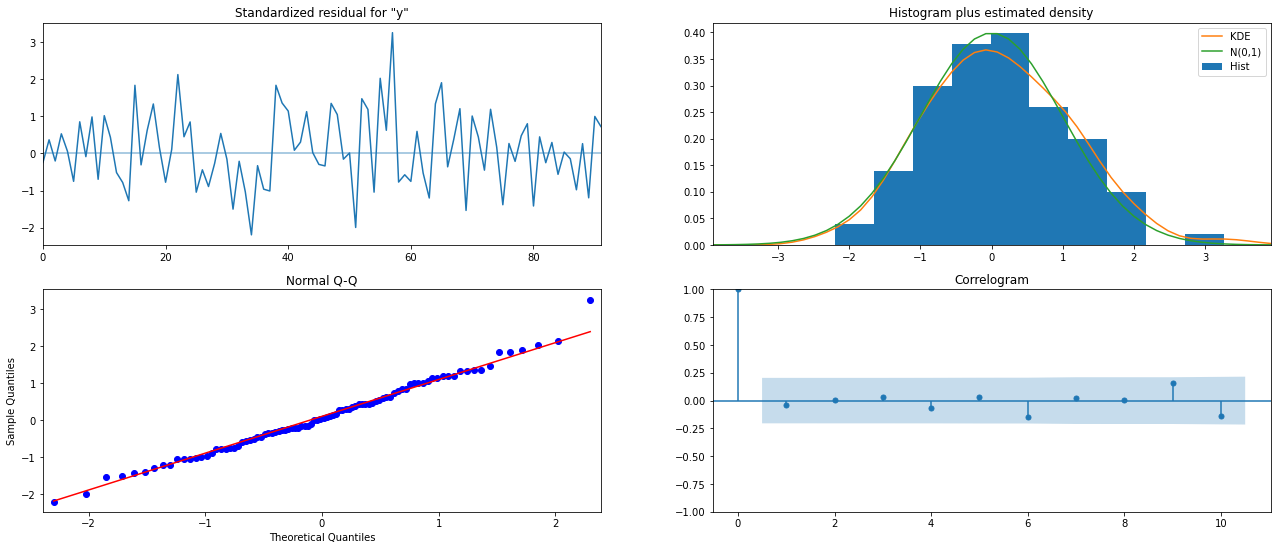

In [390]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [391]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.forecast(steps=len(test))
predicted_auto_SARIMA_12

array([ 53.72434208,  67.87012558,  67.19202871,  65.32338677,
        69.15353868,  69.50976391,  75.17648693,  77.43385746,
        77.91319993,  75.9982841 ,  92.70405355, 116.10584174,
        53.60368231,  63.55331588,  68.00059359,  62.53344583,
        67.01735438,  66.97593035,  72.11856441,  74.74859306,
        73.8444951 ,  75.09823545,  86.67607047, 109.53995597,
        49.47110839,  61.31384598,  65.03709715,  60.67006609,
        63.60496876,  63.94340257,  68.57859567,  70.33944266,
        70.62895805,  70.18374022,  83.69816212, 104.90692999,
        47.66177637,  58.61300327,  61.85200797,  57.85371805,
        60.80027388,  61.07581066,  65.50015155,  67.25815496,
        67.41543759,  67.08031876,  79.63879182,  99.64656564,
        45.8586078 ,  56.05023177,  59.18850472,  55.3398799 ,
        58.1771945 ,  58.41824838,  62.59556872])

In [394]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12,squared=False)
print(rmse)

17.842697965049194


In [396]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Automated_SARIMA(3, 1, 2)(3, 0, 2, 12)'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

Test RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.796242
Alpha=0.07,SimpleExponentialSmoothing-Brute_Force   36.435772
Alpha=0.0001,beta = 0, DoubleExponentialSmoothing   15.569001
Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing...  14.895847
Alpha=0.065,Beta=0.053,Gamma=0.0,TripleExponent...  21.154772
Alpha=0.01,Beta=0.095,Gamma=0.195,TripleExponen...   8.474348
Automated_ARIMA(3,1,3)                              15.990701
Automated_SARIMA(3, 1, 2)(3, 0, 2, 12)              17.842698
Manual_ARIMA(2, 1, 2)                               15.354881
Manual_SARIMA(2, 1, 2)(0, 0, 1, 12)                 33.389916

In [346]:
auto_sarima_test_12 = test.copy() 
auto_sarima_test_12['predict'] = predicted_auto_SARIMA_12
auto_sarima_test_12.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  53.724342
1991-02-28  55.0  67.870126
1991-03-31  66.0  67.192029
1991-04-30  65.0  65.323387
1991-05-31  60.0  69.153539

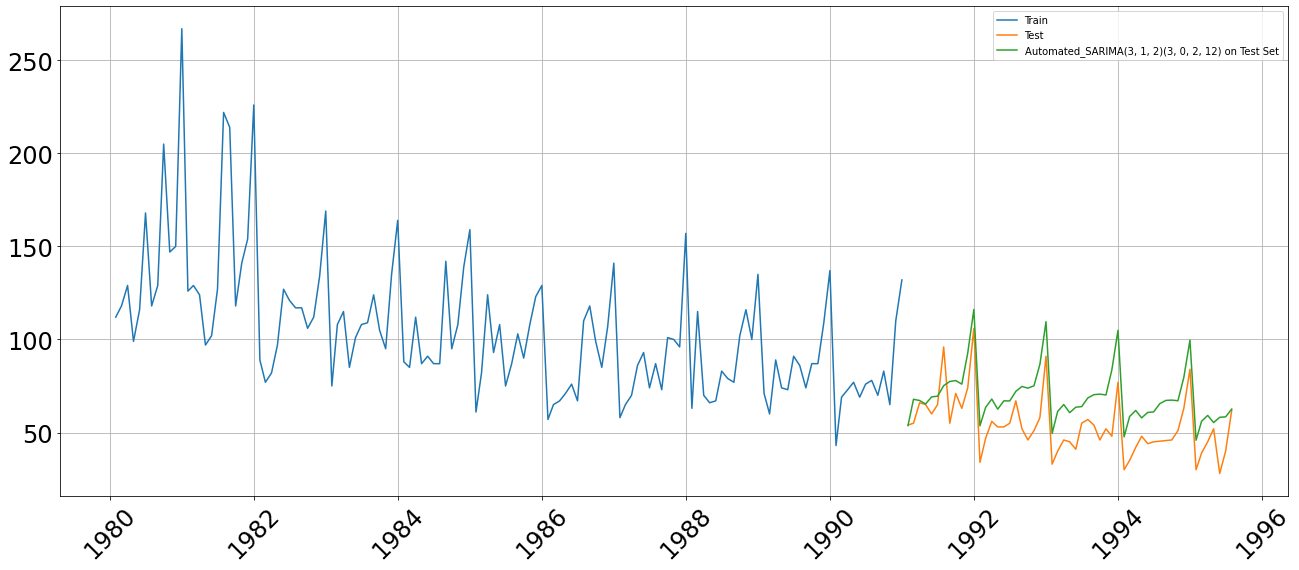

In [347]:
## Plotting on both the Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

#plt.plot(SES_train['predict',0.02], label='Alpha =0.05 Simple Exponential Smoothing predictions on Train Set')

plt.plot(auto_sarima_test_12['predict'], label='Automated_SARIMA(3, 1, 2)(3, 0, 2, 12) on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. Let us look at the ACF and the PACF plots once more.

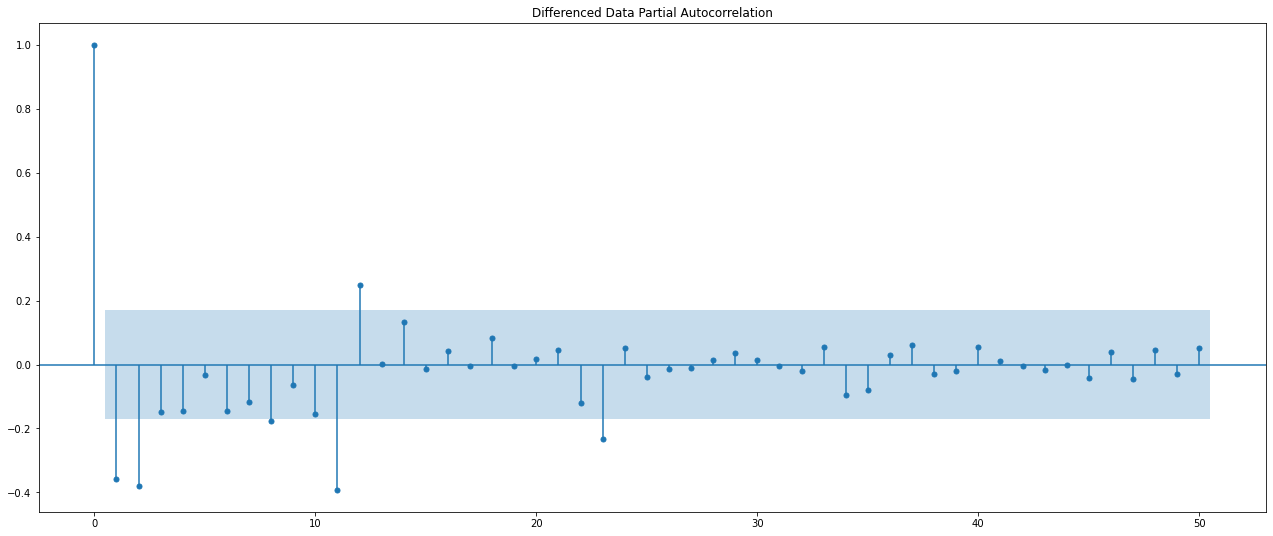

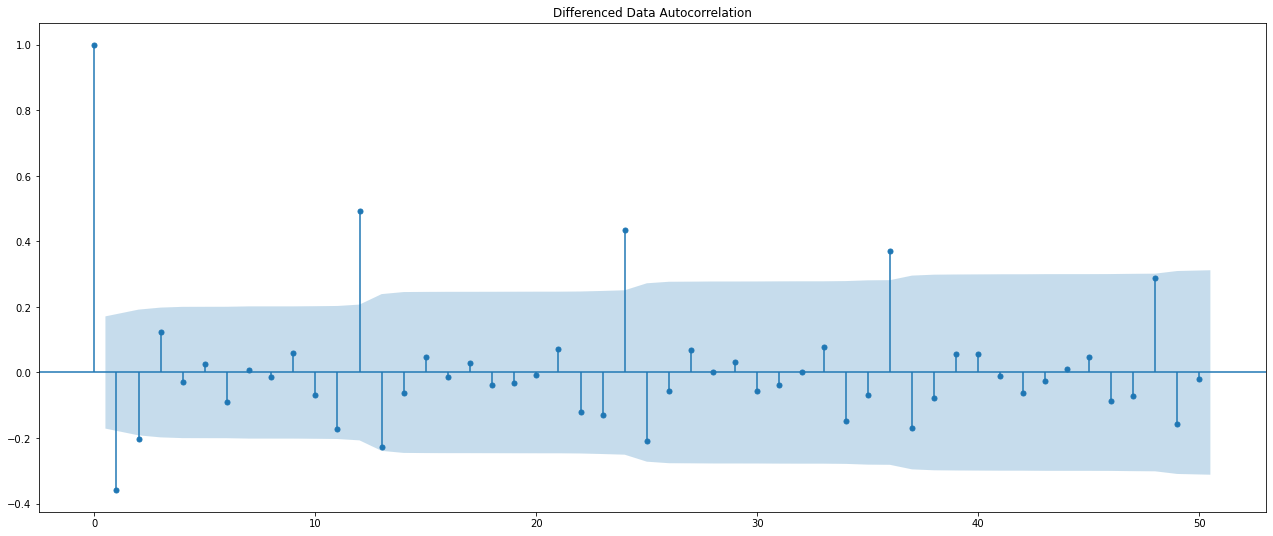

In [358]:
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation', method='ywmle')
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')

plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.
* The difference to make the series stationary is d  = 1, which is obtained from adf test

By looking at the above plots, we can say that  PACF at cuts-off at lag 2 and ACF plot cuts-off at lag 2.

In [371]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 13 Nov 2022   AIC                           1279.299
Time:                        17:23:08   BIC                           1296.550
Sample:                    02-29-1980   HQIC                          1286.309
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

In [350]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
predicted_manual_ARIMA[0]

array([79.42150504, 69.46570577, 71.72347541, 69.77311465, 69.99557877,
       69.15251841, 68.83491231, 68.25834381, 67.80940989, 67.2975693 ,
       66.81673326, 66.32061614, 65.83203053, 65.3397329 , 64.8492648 ,
       64.35789499, 63.8669696 , 63.37582517, 62.8847887 , 62.39369902,
       61.90263557, 61.41155918, 60.92048917, 60.42941602, 59.93834442,
       59.44727205, 58.95620007, 58.46512789, 57.97405581, 57.48298368,
       56.99191157, 56.50083945, 56.00976734, 55.51869523, 55.02762311,
       54.536551  , 54.04547889, 53.55440677, 53.06333466, 52.57226254,
       52.08119043, 51.59011832, 51.0990462 , 50.60797409, 50.11690198,
       49.62582986, 49.13475775, 48.64368563, 48.15261352, 47.66154141,
       47.17046929, 46.67939718, 46.18832506, 45.69725295, 45.20618084])

In [351]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

15.354880835130666


In [352]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual_ARIMA(2, 1, 2)'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

Test RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.796242
Alpha=0.07,SimpleExponentialSmoothing-Brute_Force   36.435772
Alpha=0.0001,beta = 0, DoubleExponentialSmoothing   15.569001
Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing...  14.895847
Alpha=0.065,Beta=0.053,Gamma=0.0,TripleExponent...  21.154772
Alpha=0.01,Beta=0.095,Gamma=0.195,TripleExponen...   8.474348
Automated_ARIMA(3,1,3)                              15.990701
Automated_SARIMA(3, 1, 2)(3, 0, 2, 12)              15.990701
Manual_ARIMA(2, 1, 2)                               15.354881

In [353]:
manual_arima_test = test.copy()
manual_arima_test['predict'] = predicted_manual_ARIMA[0]
manual_arima_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  79.421505
1991-02-28  55.0  69.465706
1991-03-31  66.0  71.723475
1991-04-30  65.0  69.773115
1991-05-31  60.0  69.995579

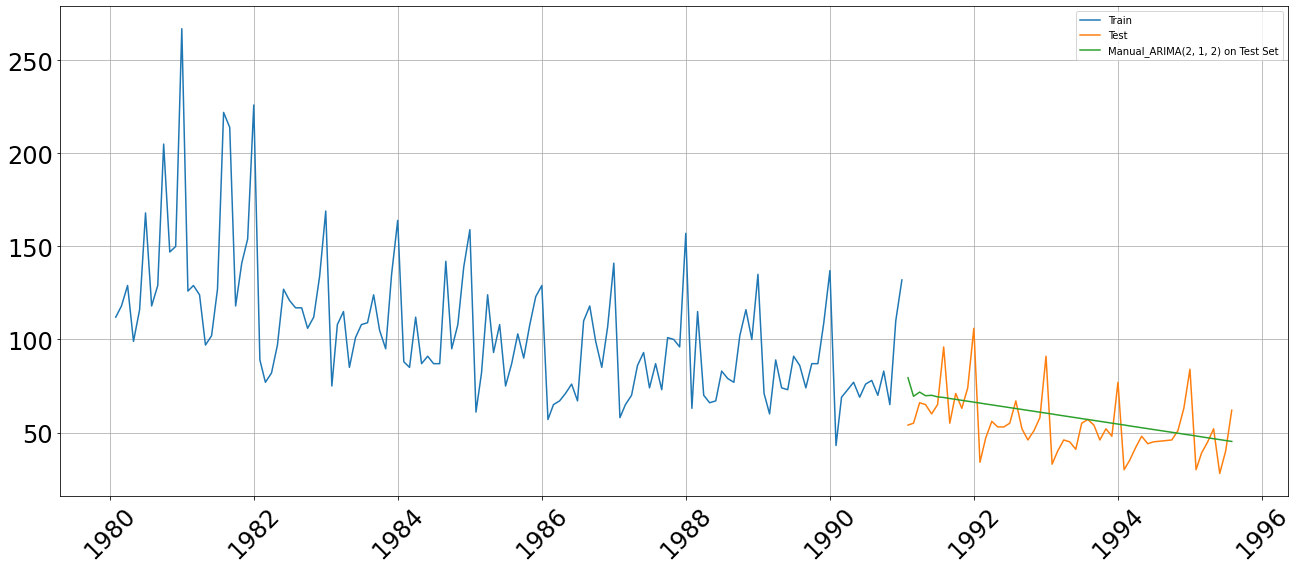

In [360]:
## Plotting on both the Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

#plt.plot(SES_train['predict',0.02], label='Alpha =0.05 Simple Exponential Smoothing predictions on Train Set')

plt.plot(manual_arima_test['predict'], label='Manual_ARIMA(2, 1, 2) on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

#### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. Seasonality at 12

Checking the ACF and the PACF plots for the new modified Time Series for alpha = 0.05.

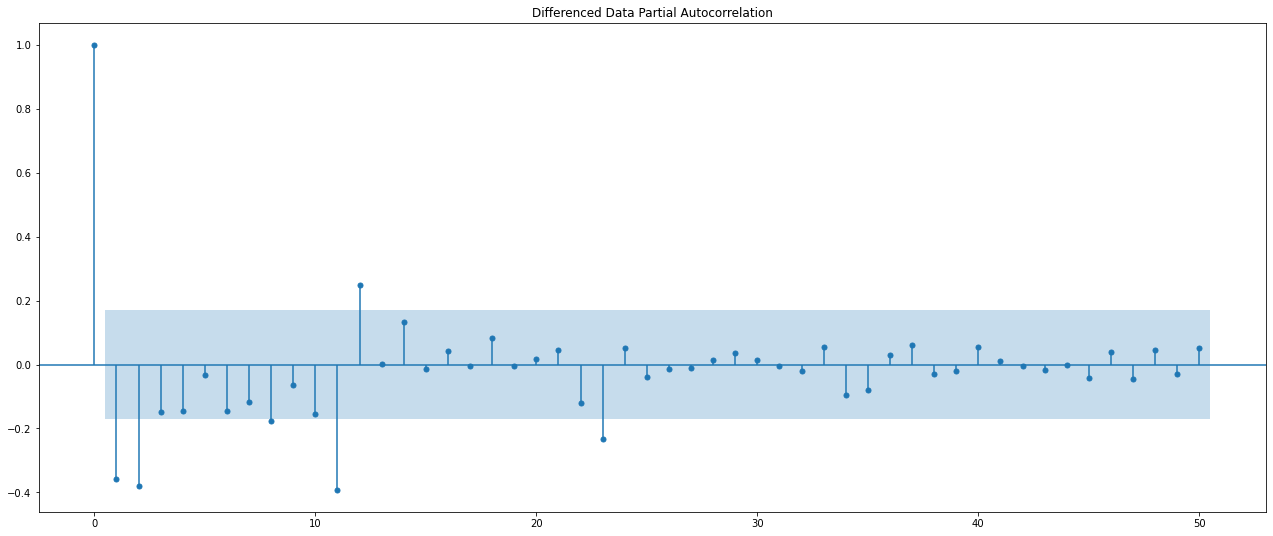

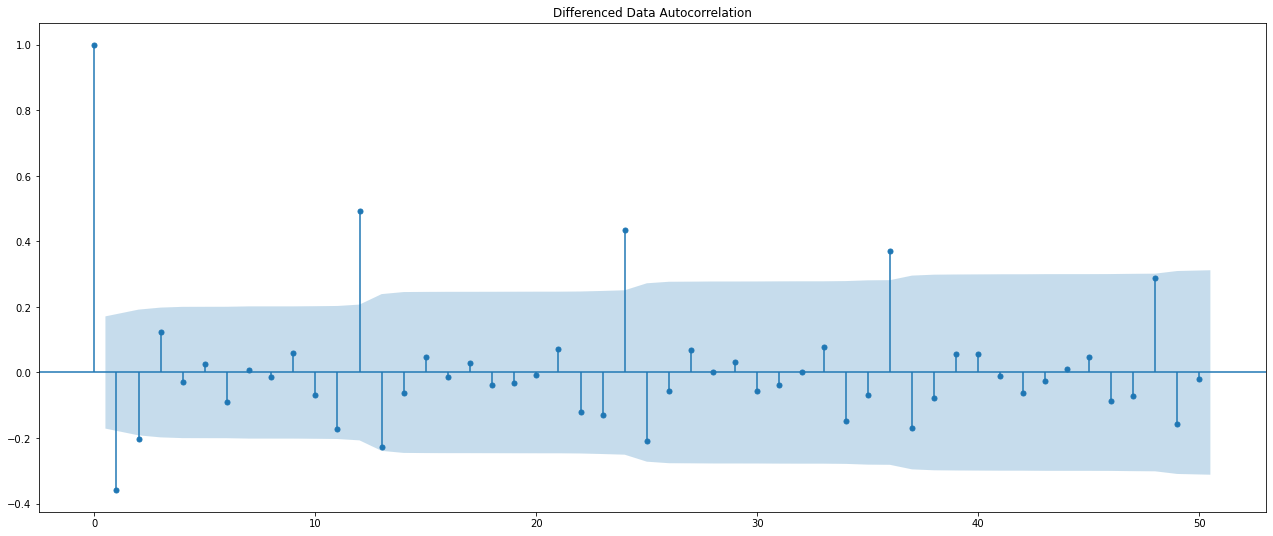

In [363]:
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation', method='ywmle')
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')

plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

Here, we have taken alpha=0.05.

We are going to take the seasonal period as F = 12.
We will keep the p(2) and q(2) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P', In PACF plot there is no significant pattern of cycle observed such that after the significant point of the cycle there is a cuts off. Therefore P = 0. 
* From the ADF test it is clear that at d=1 the series is stationary, Hence NO seasonal differencing is required D=0.
* The Moving-Average parameter in an SARIMA model is 'Q', In ACF plot for every seasonal pattern of 12, there is a cutoff therefore the value of Q = 12.

Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period). Therefore giving Q= 1 & F=12

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.


In [379]:
import statsmodels.api as sm

Manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2,1,2),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_Manual_SARIMA_12 = Manual_SARIMA_12.fit(maxiter=1000)
print(results_Manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(0, 0, [1], 12)   Log Likelihood                -536.982
Date:                              Sun, 13 Nov 2022   AIC                           1085.964
Time:                                      17:30:58   BIC                           1102.486
Sample:                                           0   HQIC                          1092.671
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3781      0.547      0.692      0.489      -0.693       1.449
ar.L2         -0.19

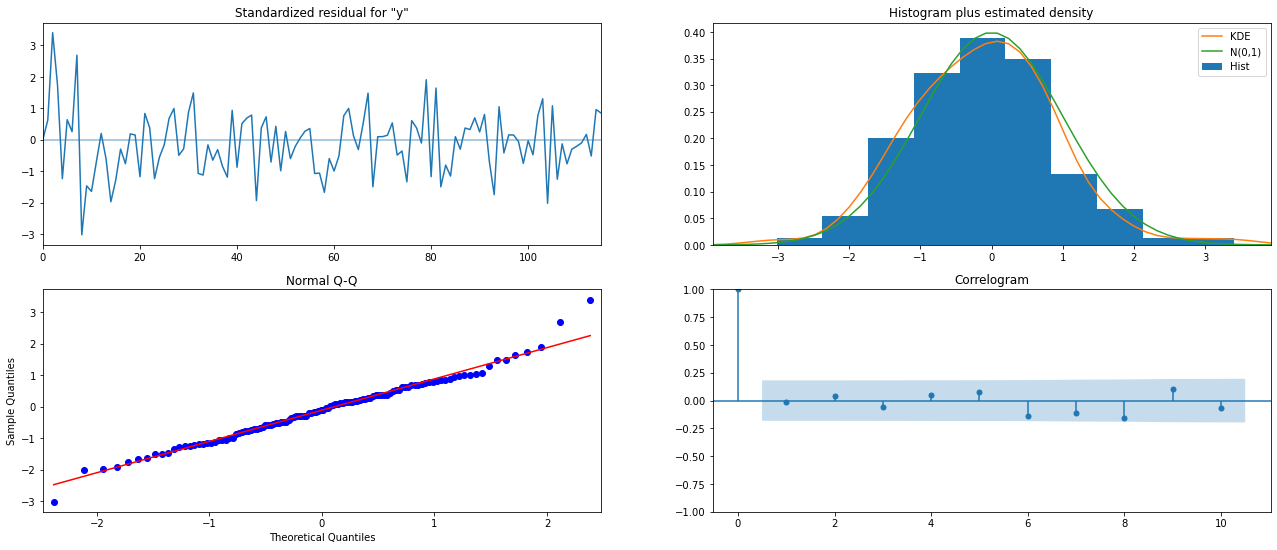

In [380]:
results_Manual_SARIMA_12.plot_diagnostics()
plt.show()

In [381]:
predicted_Manual_SARIMA_12 = results_Manual_SARIMA_12.forecast(steps=len(test))
predicted_Manual_SARIMA_12

array([67.03655262, 86.63119495, 70.36941028, 78.37128546, 73.83196037,
       77.24268438, 79.70094226, 81.13550426, 84.72514801, 75.96730861,
       93.10891561, 98.49802559, 86.38732502, 82.05183392, 82.72891925,
       83.814068  , 84.09483148, 83.99344262, 83.90141479, 83.886013  ,
       83.89779053, 83.90518881, 83.90573338, 83.90452433, 83.90396308,
       83.90398213, 83.90409667, 83.90413633, 83.90412942, 83.90411922,
       83.90411668, 83.90411768, 83.90411854, 83.90411867, 83.90411856,
       83.90411849, 83.90411848, 83.9041185 , 83.9041185 , 83.9041185 ,
       83.9041185 , 83.9041185 , 83.9041185 , 83.9041185 , 83.9041185 ,
       83.9041185 , 83.9041185 , 83.9041185 , 83.9041185 , 83.9041185 ,
       83.9041185 , 83.9041185 , 83.9041185 , 83.9041185 , 83.9041185 ])

In [384]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_Manual_SARIMA_12,squared=False)
print(rmse)

33.38991583979448


In [386]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual_SARIMA(2, 1, 2)(0, 0, 1, 12)'])

resultsDf = pd.concat([resultsDf, resultsDf_13])
resultsDf

Test RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.796242
Alpha=0.07,SimpleExponentialSmoothing-Brute_Force   36.435772
Alpha=0.0001,beta = 0, DoubleExponentialSmoothing   15.569001
Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing...  14.895847
Alpha=0.065,Beta=0.053,Gamma=0.0,TripleExponent...  21.154772
Alpha=0.01,Beta=0.095,Gamma=0.195,TripleExponen...   8.474348
Automated_ARIMA(3,1,3)                              15.990701
Automated_SARIMA(3, 1, 2)(3, 0, 2, 12)              15.990701
Manual_ARIMA(2, 1, 2)                               15.354881
Manual_SARIMA(2, 1, 2)(0, 0, 1, 12)                 33.389916

In [387]:
Manual_sarima_test_12 = test.copy() 
Manual_sarima_test_12['predict'] = predicted_Manual_SARIMA_12
Manual_sarima_test_12.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  67.036553
1991-02-28  55.0  86.631195
1991-03-31  66.0  70.369410
1991-04-30  65.0  78.371285
1991-05-31  60.0  73.831960

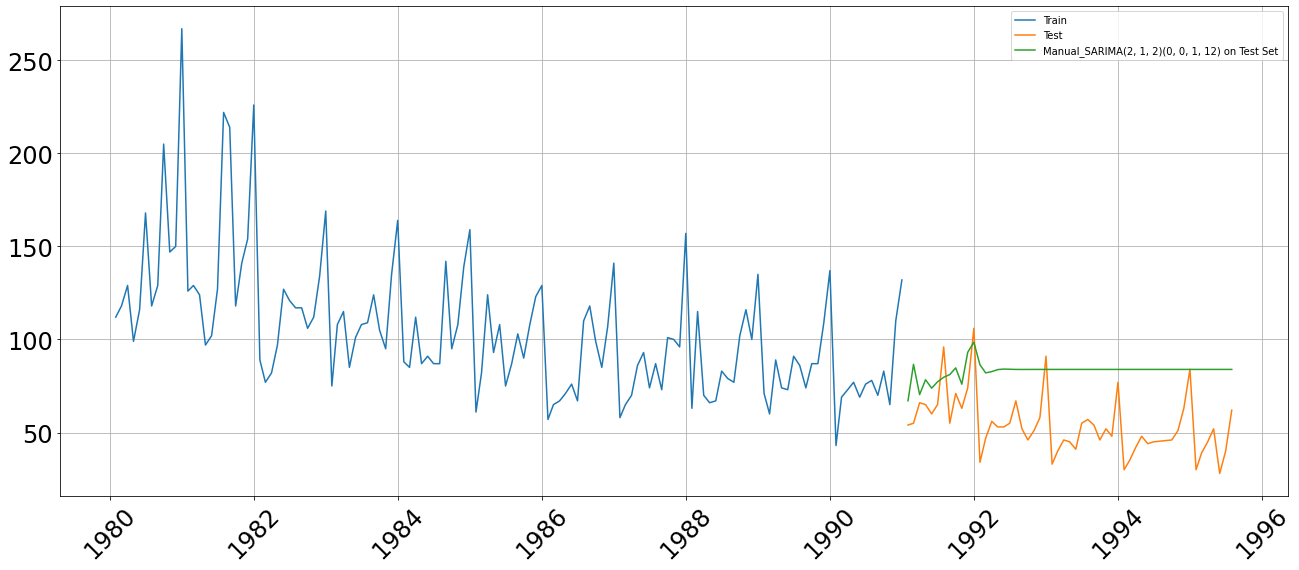

In [388]:
## Plotting on both the Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

#plt.plot(SES_train['predict',0.02], label='Alpha =0.05 Simple Exponential Smoothing predictions on Train Set')

plt.plot(Manual_sarima_test_12['predict'], label='Manual_SARIMA(2, 1, 2)(0, 0, 1, 12) on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [397]:
resultsDf

Test RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.796242
Alpha=0.07,SimpleExponentialSmoothing-Brute_Force   36.435772
Alpha=0.0001,beta = 0, DoubleExponentialSmoothing   15.569001
Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing...  14.895847
Alpha=0.065,Beta=0.053,Gamma=0.0,TripleExponent...  21.154772
Alpha=0.01,Beta=0.095,Gamma=0.195,TripleExponen...   8.474348
Automated_ARIMA(3,1,3)                              15.990701
Automated_SARIMA(3, 1, 2)(3, 0, 2, 12)              17.842698
Manual_ARIMA(2, 1, 2)                               15.354881
Manual_SARIMA(2, 1, 2)(0, 0, 1, 12)                 33.389916

In [399]:
resultsDf.sort_values('Test RMSE', ascending = True)

Test RMSE
Alpha=0.01,Beta=0.095,Gamma=0.195,TripleExponen...   8.474348
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing...  14.895847
RegressionOnTime                                    15.268955
Manual_ARIMA(2, 1, 2)                               15.354881
Alpha=0.0001,beta = 0, DoubleExponentialSmoothing   15.569001
Automated_ARIMA(3,1,3)                              15.990701
Automated_SARIMA(3, 1, 2)(3, 0, 2, 12)              17.842698
Alpha=0.065,Beta=0.053,Gamma=0.0,TripleExponent...  21.154772
Manual_SARIMA(2, 1, 2)(0, 0, 1, 12)                 33.389916
Alpha=0.07,SimpleExponentialSmoothing-Brute_Force   36.435772
Alpha=0.1,SimpleExponentialSmoothing                36.796242
SimpleAverageModel                                  53.460570
NaiveModel                                          79.718773

From the above table it is clear that Brute Force Triple exponential performed the best

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

The Model that has least rmse score is Triple Exponential Smoothing Brute Force Method

In [400]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.01,
                                                                 smoothing_trend=0.095,
                                                                 smoothing_seasonal=0.195)

In [403]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE of full dataset:',RMSE_fullmodel1)

RMSE of full dataset: 17.915673771691907


In [415]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

In [416]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-31   6.536404   41.579851   76.623298
1995-09-30   7.242989   42.286436   77.329883
1995-10-31   7.930174   42.973620   78.017067
1995-11-30  14.574301   49.617748   84.661194
1995-12-31  33.341604   68.385051  103.428498

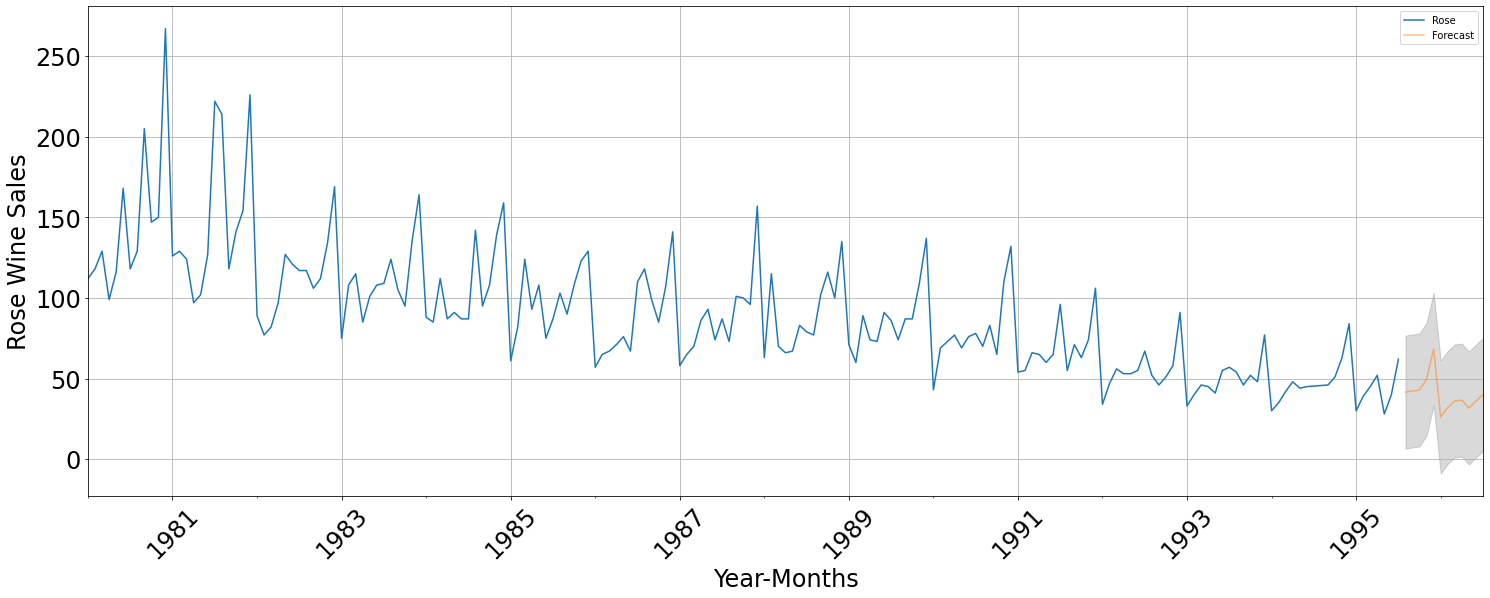

In [420]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(25,9))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months',fontsize=24)
axis.set_ylabel('Rose Wine Sales',fontsize=24)

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid()
plt.show()